<a href="https://colab.research.google.com/github/joanby/matematicas-ml/blob/master/6-statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la Estadística

Esta clase, *Introducción a la Estadística*, se basa en la teoría de la probabilidad para permitirnos cuantificar nuestra confianza sobre cómo se relacionan entre sí las distribuciones de datos.

A través de la exposición mesurada de la teoría junto con ejemplos interactivos, desarrollará una comprensión práctica de todas las pruebas estadísticas esenciales para evaluar si los datos están correlacionados entre sí o muestreados de diferentes poblaciones - pruebas que con frecuencia son útiles para evaluar críticamente las entradas y salidas de los algoritmos de aprendizaje automático. También aprenderá a utilizar la regresión para hacer predicciones sobre el futuro basándose en datos de entrenamiento.

El contenido cubierto en esta clase se basa en el contenido de otras clases de la serie *Fundamentos del Aprendizaje Automático* (álgebra lineal, cálculo y teoría de la probabilidad) y es en sí mismo fundamental para la clase *Optimización*.

En el transcurso del estudio de este tema, vamos a:

* Desarrollar una comprensión de lo que está pasando bajo el capó de los modelos estadísticos predictivos y algoritmos de aprendizaje automático, incluidos los utilizados para el aprendizaje profundo.
* Hipotetizar sobre y evaluar críticamente las entradas y salidas de algoritmos de aprendizaje automático utilizando herramientas estadísticas esenciales como la prueba t, ANOVA y R-cuadrado.
* Utilizar datos históricos para predecir el futuro utilizando modelos de regresión que aprovechan la teoría estadística frecuentista (para conjuntos de datos más pequeños) y la teoría moderna del aprendizaje automático (para conjuntos de datos más grandes), incluyendo por qué es posible que deseemos considerar la aplicación del aprendizaje profundo a un problema determinado.


**Ten en cuenta que este cuaderno Jupyter no está pensado para ser utilizado solo. Es el código que acompaña a una clase o a los vídeos de la serie [Fundamentos de Machine Learning](https://github.com/joanby/matematicas-ml) de Juan Gabriel Gomila y Frogames Formación, que ofrecen detalles sobre lo siguiente:**

**Segmento 1: Estadística Frecuentista**

* Estadística Frecuentista vs. Bayesiana
* Revisión de la Teoría de la Probabilidad Relevante
* Puntuaciones z y valores atípicos
* Valores p
* Comparación de medias con pruebas t
* Intervalos de confianza
* ANOVA: Análisis de la varianza
* Coeficiente de correlación de Pearson
* Coeficiente de determinación R-cuadrado
* Correlación frente a causalidad
* Corrección de comparaciones múltiples

**Segmento 2: Regresión**

* Características: Variables Independientes vs Dependientes
* Regresión lineal para predecir valores continuos
* Ajuste de una recta a puntos en un plano cartesiano
* Mínimos cuadrados ordinarios
* Regresión logística para predecir categorías

**Segmento 3: Estadística Bayesiana**

* (Profundidad) ML vs Estadística Frecuencial
* Cuándo usar Estadística Bayesiana
* Probabilidades a priori
* Teorema de Bayes
* Cuaderno PyMC3
* Recursos para profundizar en Probabilidad y Estadística


## Segmento 1: Estadística Frecuentista

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)

### Medidas de Tendencia Central

Las medidas de tendencia central proporcionan una estadística resumida sobre el centro de una distribución determinada, es decir, el valor «medio» de la distribución.


In [ ]:
x = st.skewnorm.rvs(10, size=1000)

In [ ]:
x[0:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

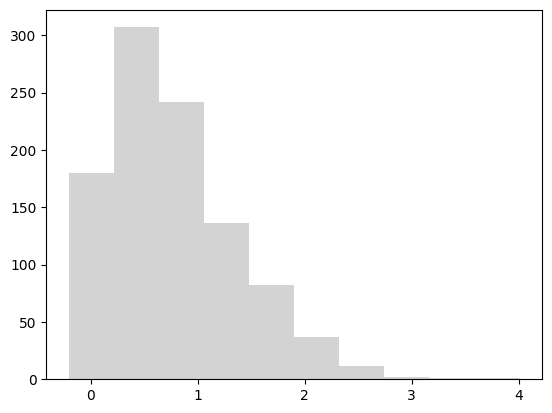

In [ ]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgray')

#### Media

La medida más común de tendencia central, sinónimo del término «media», es la **media**, a menudo simbolizada con $\mu$ (población) o $\bar{x}$ (muestra):


$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [ ]:
xbar = x.mean()
xbar

0.7719211854654121

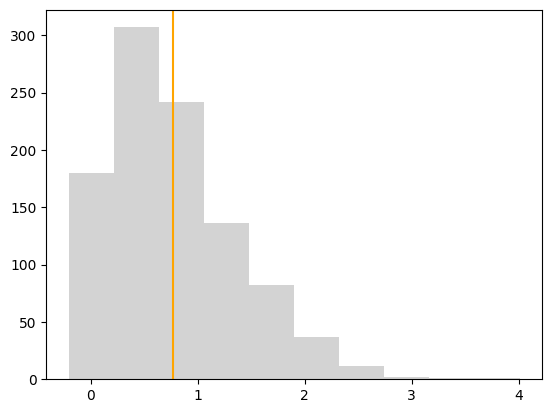

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
_ = plt.hist(x, color = 'lightgray')

#### Mediana

La segunda medida de tendencia central más común es la **mediana**, el valor del punto medio de la distribución:


In [ ]:
np.median(x)

0.651420257427958

La **moda** se ve menos afectado por la asimetría, pero normalmente sólo es aplicable a distribuciones discretas. Para distribuciones continuas con asimetría (por ejemplo, datos salariales), la mediana suele ser la medida de tendencia central elegida:


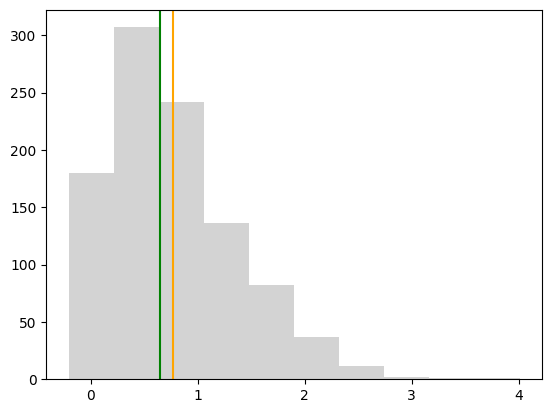

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Medidas de Dispersión

#### Varianza

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [ ]:
x.var()

0.35528419278021617

#### Desviación Estándar

Una derivada directa de la varianza es la **desviación estándar** (denotada con $\sigma$), que es conveniente porque sus unidades están en la misma escala que los valores de la distribución:
$$ \sigma = \sqrt{\sigma^2} $$


In [ ]:
x.var()**(1/2)

0.5960572059628305

In [ ]:
sigma = x.std()
sigma

0.5960572059628305

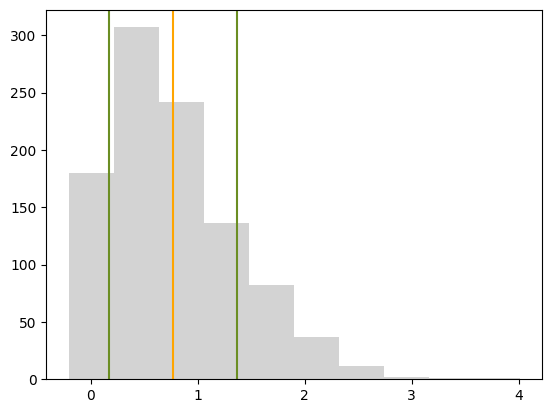

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Error Estandar

Otra derivación de la desviación estándar es el **error estándar**, que se denota con $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$


In [ ]:
sigma/(x.size)**(1/2)

0.018848983865986414

In [ ]:
st.sem(x) # por defecto a 1 grado de libertad, que puede ignorarse con los grandes conjuntos de datos de ML

0.018858415432183823

In [ ]:
sigma/(x.size-1)**(1/2)

0.018858415432183823

In [ ]:
st.sem(x, ddof=0)

0.018848983865986414

El error estándar nos permite comparar si las medias de dos distribuciones difieren *significativamente*, un punto central de *Introducción a la Estadística*.


### Distribución Gaussiana

Nombrada así por Carl Friedrich Gauss. También conocida con el nombre de **distribución normal**:

In [ ]:
x = np.random.normal(size=10000)

In [ ]:
sns.set_style('ticks')

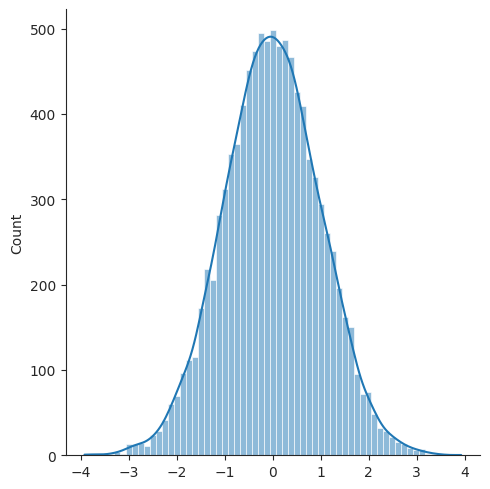

In [ ]:
_ = sns.displot(x, kde=True)

El error estándar nos permite comparar si las medias de dos distribuciones difieren *significativamente*, un punto central de *Intro to Stats*.


In [ ]:
x.mean()

-0.01626305454909193

In [ ]:
x.std()

1.0039756140435032

...es una **distribución normal estándar** (también conocida como distribución gaussiana estándar o ***distribución z***), que se puede denotar como $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (observando que $\sigma^2 = \sigma$ aquí porque $1^2 = 1$).


Las distribuciones normales son, con diferencia, las más comunes en estadística y aprendizaje automático. Suelen ser la opción por defecto, sobre todo si se tiene información limitada sobre el proceso aleatorio que se está modelando, porque:

1. Las distribuciones normales asumen la mayor incertidumbre posible sobre la variable aleatoria que representan (en relación con cualquier otra distribución de varianza equivalente). Los detalles de esto están fuera del alcance de este tutorial.
2. Tanto los procesos aleatorios simples como los muy complejos tienen, en todas las condiciones habituales, una distribución normal cuando muestreamos valores del proceso. Dado que muestreamos datos para modelos estadísticos y de aprendizaje automático por igual, este llamado **teorema del límite central** (que se trata a continuación) es un concepto de importancia crítica.


### El Teorema Central del Límite

Para desarrollar una comprensión funcional de la CLT, vamos a muestrear algunos valores de nuestra distribución normal:


In [ ]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.10069587,  1.35557294,  0.66536894, -3.17042574,  0.43948605,
        0.53629091, -1.04552949, -0.99434937, -0.74023225, -0.54129909])

La media de una muestra no siempre va a ser cercana a cero con una muestra tan pequeña:


In [ ]:
x_sample.mean()

-0.35958129882198664

Definamos una función para generar **distribuciones muestrales** de la media de una distribución de entrada dada:


In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

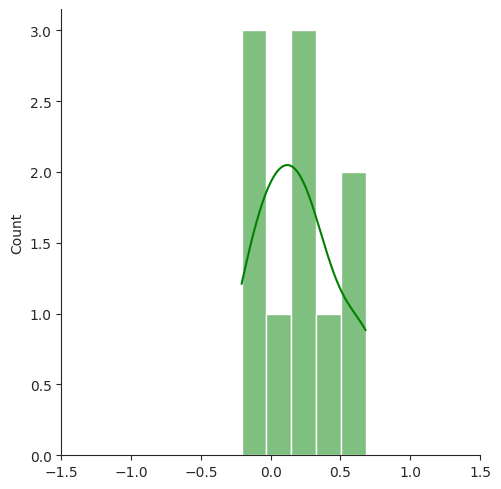

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

Cuantas más muestras tomemos, más probable será que la distribución muestral de las medias se distribuya normalmente:


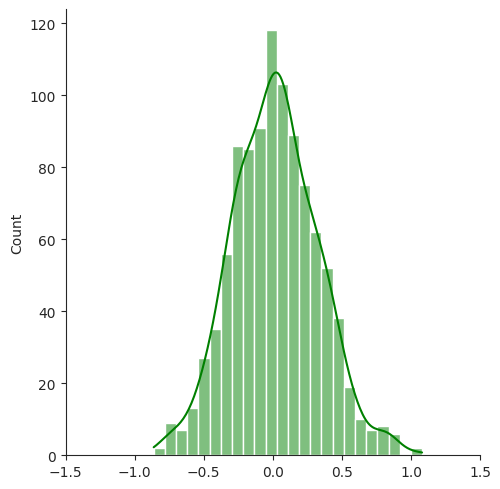

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

Cuanto mayor sea la muestra, más ajustadas tenderán a ser las medias muestrales en torno a la media poblacional:


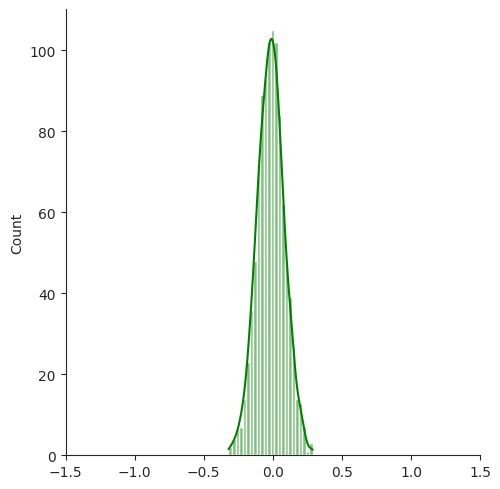

In [ ]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

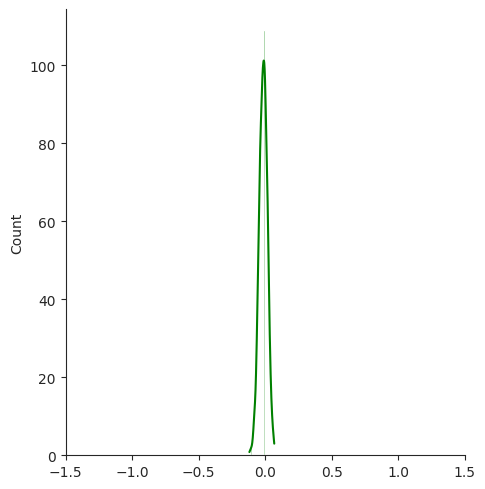

In [ ]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Muestreo de una distribución sesgada


In [ ]:
s = st.skewnorm.rvs(10, size=10000)

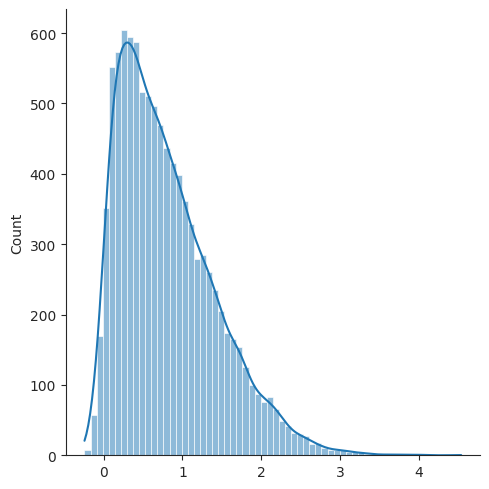

In [ ]:
_ = sns.displot(s, kde=True)

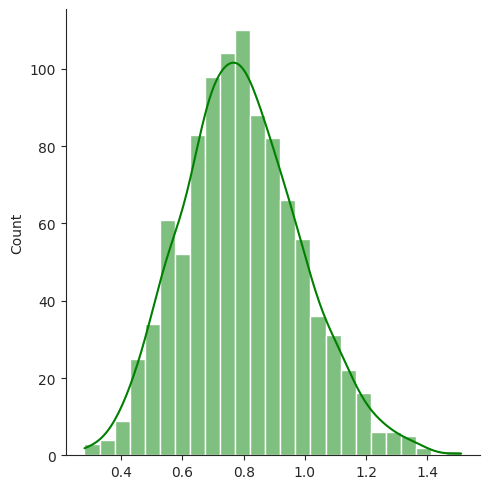

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

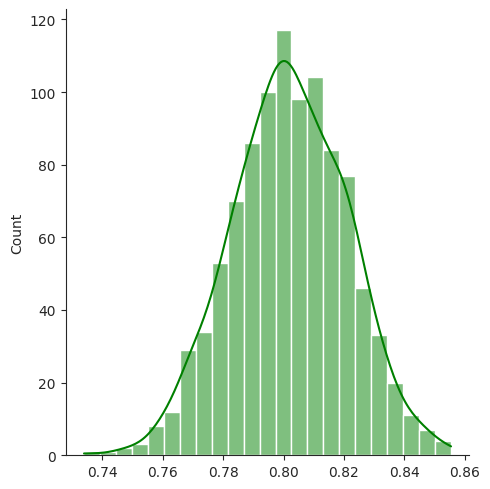

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Muestreo de una distribución multimodal


In [ ]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

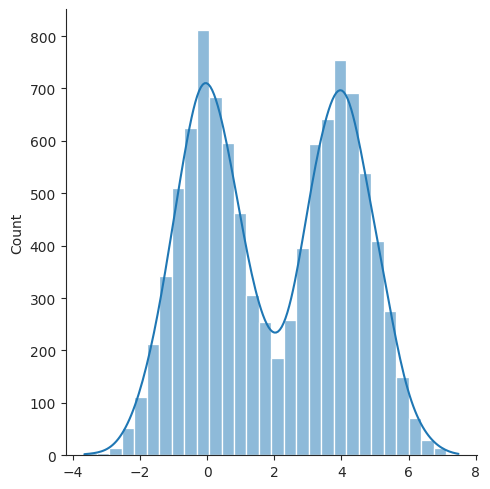

In [ ]:
_ = sns.displot(m, kde=True)

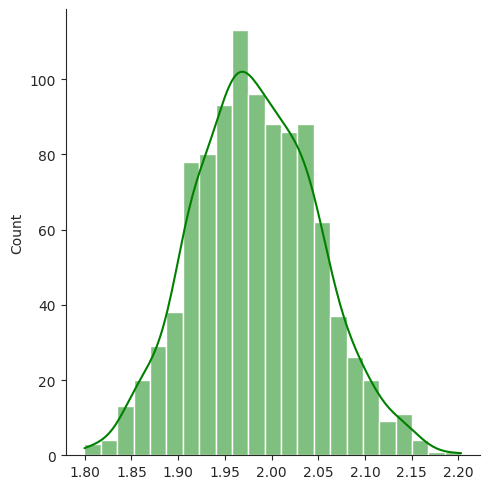

In [ ]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Muestreo uniforme


Incluso tomando muestras de una distribución uniforme muy poco normal, la distribución de muestreo resulta normal:


In [ ]:
u = np.random.uniform(size=10000)

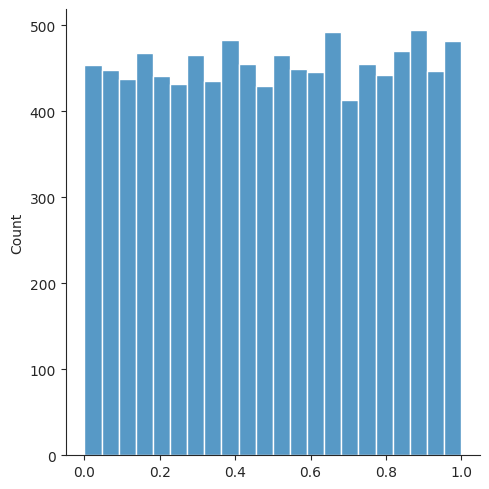

In [ ]:
_ = sns.displot(u)

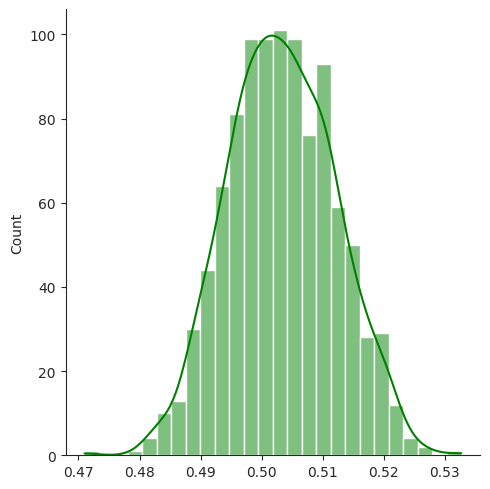

In [ ]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Por lo tanto, con tamaños de muestra suficientemente grandes, podemos suponer que la distribución muestral de las medias se distribuirá normalmente, lo que nos permite aplicar modelos estadísticos y de ML configurados para ruido distribuido normalmente, que suele ser la suposición por defecto.

Como ejemplo, la «prueba *t*» (tratada brevemente en *Introducción a la Estadística*) nos permite inferir si dos muestras proceden de poblaciones diferentes (digamos, un grupo experimental que recibe un tratamiento y un grupo de control que recibe un placebo). Gracias a la CLT, podemos utilizar esta prueba incluso si no tenemos ni idea de cuáles son las distribuciones subyacentes de las poblaciones sometidas a prueba, lo que puede ser el caso más frecuente.


### z-scores

Suponiendo que los datos se distribuyen normalmente, una puntuación z indica cuántas desviaciones estándar se alejan de la media de un punto de datos (por ejemplo, $x_i$):

$$ z = \frac{x_i-\mu}{\sigma} $$

Es decir, la fórmula *estandariza* una puntuación dada $x_i$ a la distribución (normal estándar) *z*. (Como cubrimos en *Probabilidad y Teoría de la Información*, se podría estandarizar cualquier distribución normal a una media de cero y una desviación estándar de uno restando su media original y dividiendo después por su desviación estándar original).


Por ejemplo, supongamos que obtienes un 85% en un examen de Matemáticas. Si la media fuera del 60% con una desviación estándar del 10%, te parecería una nota bastante buena y lo habrías hecho muy bien en comparación con tus compañeros:


In [ ]:
x_i = 85
mu = 60
sigma = 10

In [ ]:
x = np.random.normal(mu, sigma, 10000)

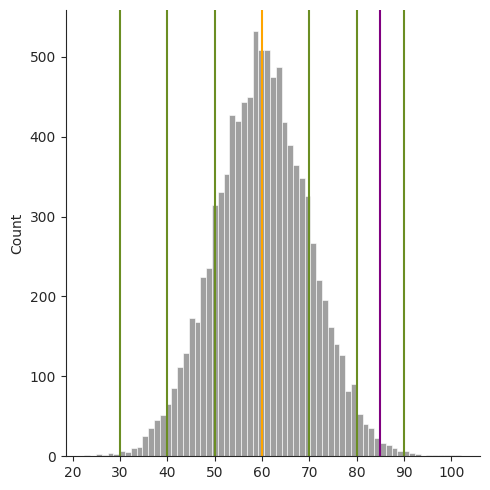

In [ ]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Su puntuación z está 2,5 desviaciones estándar por encima de la media:


In [ ]:
z = (x_i - mu)/sigma
z

2.5

O utilizando nuestra clase simulada de 10k alumnos de Matemáticas:


In [ ]:
z = (x_i - np.mean(x))/np.std(x)
z

2.5063103401632336

Menos del uno por ciento de la clase te superó:


In [ ]:
len(np.where(x > 85)[0])

69

In [ ]:
100*69/10000

0.69

In [ ]:
np.percentile(x, 99)

83.35787058294662

Por el contrario, si la puntuación media de tus compañeros es 90 y la desviación típica es 2:


In [ ]:
mu = 90
sigma = 2

In [ ]:
y = np.random.normal(mu, sigma, 10000)

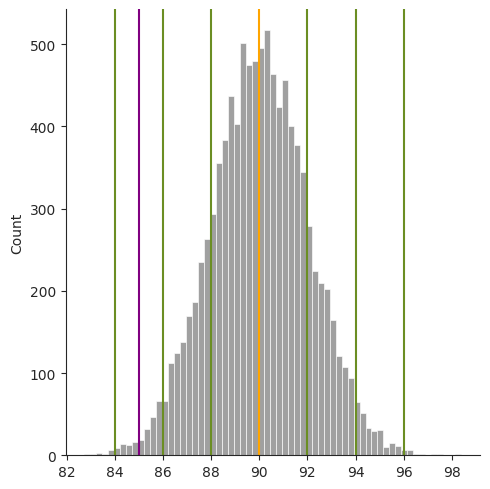

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Tu puntuación z está 2,5 desviaciones estándar *por debajo* de la media (!):


In [ ]:
z = (x_i - mu)/sigma
z

-2.5

O utilizando nuestra clase simulada de 10k alumnos de Matemáticas:


In [ ]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.479852596293303

En ese caso, más del 99% de la clase te superó:


In [ ]:
len(np.where(y > 85)[0])

9933

In [ ]:
100*9933/10000

99.33

Sólo 67 personas lo hicieron peor que tu:


In [ ]:
10000-9933

67

In [ ]:
np.percentile(y, 1)

85.3781445632019

Una convención frecuentista es considerar que un punto de datos que se encuentra a más de tres desviaciones estándar de la media es un **valor atípico**.

Es una buena idea investigar individualmente los valores atípicos en sus datos, ya que pueden representar un punto de datos erróneo (por ejemplo, algunos datos por accidente, un error de entrada de datos, o un experimento fallido) que tal vez debería ser eliminado de un análisis posterior (especialmente, ya que los valores atípicos pueden tener un impacto desproporcionado en las estadísticas, incluyendo la media y la correlación). Incluso puede indicarle un problema importante con su metodología de recopilación de datos o su modelo ML que puede resolverse o para el que podría tener una prueba unitaria.


**Ejercicios**

1. En cargada y envión, una competición de halterofilia, haces un levantamiento de 100 kg. El peso medio de C&E en la competición es de 100kg. ¿Cuál es tu puntuación z para C&E?
2. En la misma competición, en arrancada levantas 100 kg. El peso medio en arrancada es de 80 kg con una desviación estándar de 10 kg. ¿Cuál es tu puntuación z para la prueba?
3. En halterofilia olímpica, tu puntuación global es la suma total de tus pesos en C&E y arrancada. La media de estos totales entre los competidores es de 180 kg con una desviación estándar de 5 kg. ¿Cuál es tu puntuación z global en la competición?

**Alerta de spoiler**: Soluciones a continuación


In [ ]:
x_i = 100
mu = 100
sigma = 1

z = (x_i-mu)/sigma
z

0.0

In [ ]:
x_i = 100
mu = 80
sigma = 10

z = (x_i-mu)/sigma
z

2.0

In [ ]:
x_i = 100 + 100
mu = 180
sigma = 5

z = (x_i-mu)/sigma
z

4.0

**Soluciones**
1. cero
2. dos
3. cuatro (¡puedes haber ganado el encuentro!)


### *p*-valores

Cuantifican la *p*robabilidad de que una observación determinada se produzca por mera casualidad.

Por ejemplo, hemos visto anteriormente que con nuestros 10.000 resultados de exámenes simulados, sólo 69 personas obtuvieron una puntuación *z* superior a 2,5 y sólo 67 (=10000-9933) obtuvieron una puntuación *z* inferior a -2,5. Por lo tanto, si tomáramos una muestra aleatoria de uno de los 10.000 resultados del examen CS101, esperaríamos que estuviera fuera de 2,5 (es decir, +/- 2,5) desviaciones estándar sólo el 1,36% de las veces:

$$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalente a aumentar el tamaño de nuestra clase de Matemáticas de 10k hacia el infinito, la probabilidad de que una puntuación esté a más de 2,5 desviaciones estándar de la media de una distribución normal puede determinarse con la *función de distribución acumulativa* (CDF) de la distribución:


In [ ]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [ ]:
p_below*10000

62.096653257761325

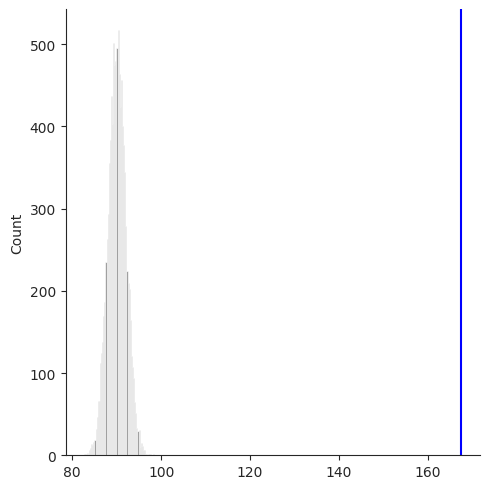

In [ ]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [ ]:
st.norm.cdf(2.5)

0.9937903346742238

In [ ]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

In [ ]:
p_above*10000

62.09665325776159

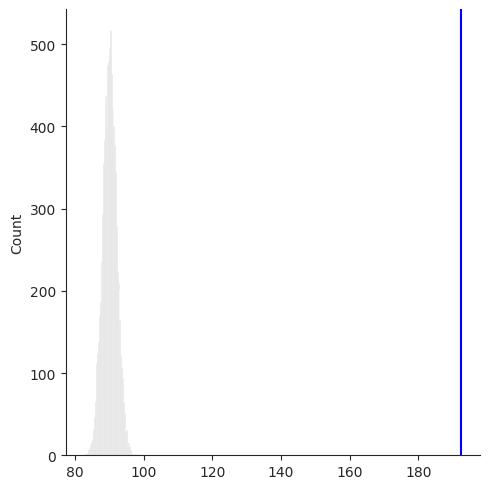

In [ ]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [ ]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

In [ ]:
p_outside*10000

124.1933065155229

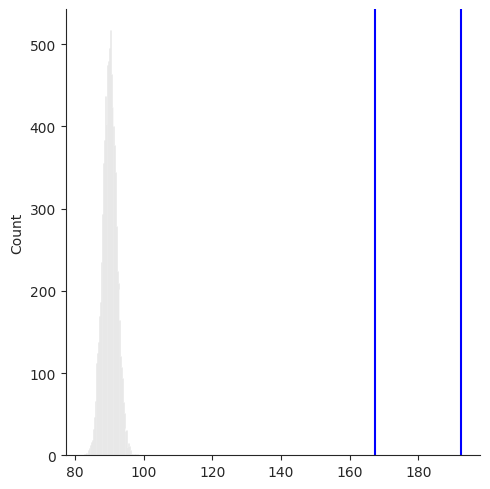

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

En otras palabras, suponiendo una distribución normal, la probabilidad (el valor *p*) de que un valor muestreado se aleje al menos 2,5 desviaciones típicas de la media sólo por azar es $p \approx .0124$.


La convención frecuentista es que si un valor *p* es inferior a 0,05, podemos decir que se trata de una observación «estadísticamente significativa». Normalmente denotamos este umbral de significación con $\alpha$, por ejemplo, $\alpha = .05$.

Por ejemplo, con una moneda justa, la probabilidad de lanzar seis caras *o* seis cruces en un experimento de lanzamiento de seis monedas es 0,03125 ($p = 0,015625$ para *cualquiera de* las seis caras o seis cruces). Consulte el método `coinflip_prob()` del [*cuaderno de probabilidad*](https://github.com/joanby/matematicas-ml/blob/master/notebooks/5-probability.ipynb) para comprobarlo.

Si un amigo tuyo te da una moneda, la **hipótesis nula** (la línea de base asumida por la distribución fair-toss) sería que la moneda es justa. Si pruebas esta moneda lanzándola seis veces y sale cara en las seis o cruz en las seis, esta observación sugeriría que deberías *rechazar la hipótesis nula* porque el azar por sí solo facilitaría tal observación menos del 5% de las veces, es decir, $p < .05$.


Las puntuaciones *z* correspondientes a $\alpha = .05$ pueden obtenerse a partir de la *función de punto porcentual* (PPF) de la distribución normal, que facilita la inversa de la CDF. Para capturar el 95% de los valores alrededor de la media, dejamos un 2,5% en la parte inferior de la distribución y un 2,5% en la parte superior:


In [ ]:
st.norm.ppf(.025)

-1.9599639845400545

In [ ]:
st.norm.ppf(.975)

1.959963984540054

Así, con el tradicional $\alpha = .05$, un valor muestreado con *z*-score inferior a -1,96 o superior a 1,96 se consideraría estadísticamente significativo.


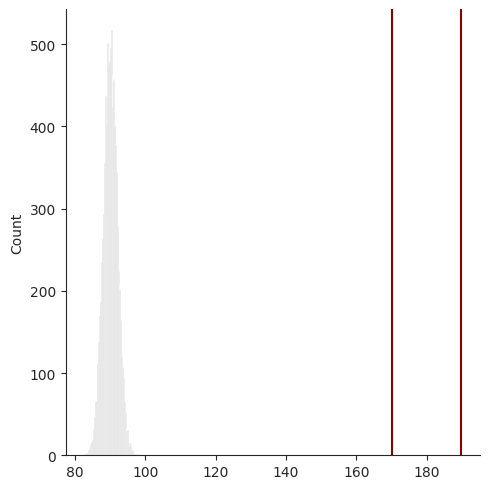

In [ ]:
sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

Con un umbral más estricto, digamos
 $\alpha = .01$:

In [ ]:
st.norm.ppf(.005)

-2.575829303548901

In [ ]:
st.norm.ppf(.995)

2.5758293035489004

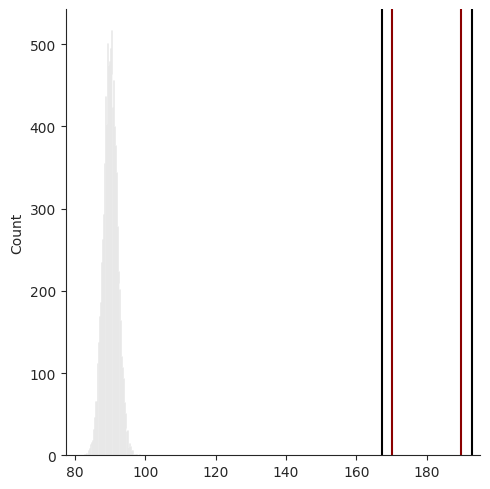

In [ ]:
sns.displot(y, color='gray')

plt.axvline(mu+1.96*sigma, color='darkred')
plt.axvline(mu-1.96*sigma, color='darkred')

plt.axvline(mu+2.56*sigma, color='black')
_ = plt.axvline(mu-2.56*sigma, color='black')

(Si el tiempo lo permite, una discusión sobre las pruebas de valor *p* de dos colas frente a las de una cola sería informativa aquí).


In [ ]:
st.norm.ppf(0.95)

1.6448536269514722

In [ ]:
st.norm.ppf(0.99)

2.3263478740408408

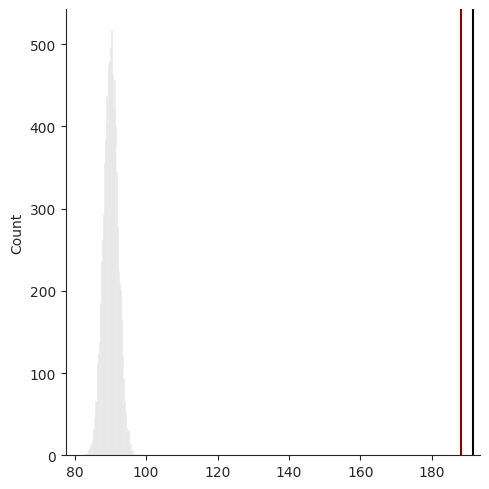

In [ ]:
sns.displot(y, color='gray')

plt.axvline(mu+1.645*sigma, color='darkred')

plt.axvline(mu+2.32*sigma, color='black')

**Ejercicios**

1. ¿Cuáles son los valores *p* asociados a los resultados de levantamiento de pesas de los tres ejercicios anteriores?
2. Con la norma $\alpha = .05$, ¿cuáles de los tres resultados de levantamiento de pesas son «estadísticamente significativos»?

**Alerta de spoiler**: Soluciones a continuación


**Soluciones**

1a. Este resultado está en la media, que es también la mediana para una distribución normal; exactamente la mitad de los valores están por encima que por debajo. Esto corresponde al valor $p$ más alto posible, $p=1$, porque cualquier valor de la distribución tiene garantizado estar por encima o por debajo:


In [ ]:
p_below = st.norm.cdf(0)
p_below

0.5

In [ ]:
p_above = 1-st.norm.cdf(0)
p_above

0.5

In [ ]:
p_below + p_above

1.0

Más generalmente:

In [ ]:
def p_from_z(my_z):
    return 2 * st.norm.cdf(-abs(my_z))

In [ ]:
p_from_z(0)

1.0

1b. La probabilidad de que un valor esté por debajo de $z = -2$ es:


In [ ]:
p_below = st.norm.cdf(-2)
p_below

0.022750131948179195

...y la probabilidad de que un valor esté por encima de $z=2$ es la misma:


In [ ]:
p_above = 1-st.norm.cdf(2)
p_above

0.02275013194817921

Por lo tanto, el valor *p* -- la probabilidad de que un valor esté por debajo de $z=-2$ o por encima de $z=2$ -- es:


In [ ]:
p_below + p_above

0.0455002638963584

In [ ]:
p_from_z(2)

0.04550026389635839

1c. Siguiendo los mismos cálculos que hicimos para 1b, el valor *p* para una observación a 4 desviaciones típicas de la media es:


In [ ]:
p_from_z(4)

6.334248366623973e-05

...que es aproximadamente 0.0000633:

In [ ]:
0.0000633

6.33e-05

(Por cierto, los valores *p* muy pequeños se comunican a menudo como valores **logarítmicos negativos *P***, ya que son mucho más fáciles de leer...).

In [ ]:
-np.log10(6.33e-05)

4.198596289982645

2. El valor absoluto de la puntuación *z* de tu arrancada y de tu puntuación combinada es superior a 1,96, por lo que ambas son «estadísticamente significativas». Tu rendimiento en el levantamiento de peso no podría haber sido menos significativo.


### Comparación de medias con *t*-tests

Mientras que las puntuaciones *z* se aplican únicamente a *valores individuales*, las pruebas *t* nos permiten comparar (la media de) una muestra de *valores múltiples* con una media de referencia.


#### Muestra única de Student *t*-test

Lleva el nombre de William Sealy Gosset, científico y matemático formado en Oxford, que se convirtió en un robusto estadístico de Guinness (sí, los de la cerveza) en Dublín (desde 1899 hasta su fatal ataque al corazón en 1937, poco después de ser ascendido a cervecero jefe). Además de sus periodos sabáticos en el Laboratorio de Biometría de Karl Pearson en la UCL, Gosset publicó bajo el seudónimo de Student (incluso sobre la prueba *t*, a partir de 1908), ya que publicar iba en contra de la política de Guinness.


Recordando la fórmula para calcular una puntuación *z*:

$$ z = \frac{x_i-\mu}{\sigma} $$

La **prueba de una sola muestra *t*** es una variación del tema y se define por:

$$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$

Donde:
* $\bar{x}$ es la media muestral
* $\mu_0$ es una media de referencia, por ejemplo, la media poblacional conocida o la media de la «hipótesis nula».
* $s_{\bar{x}}$ es el error estándar de la muestra


Supongamos que eres el cervecero jefe de Guinness. Su proceso básico de elaboración de cerveza produce 50 litros de cerveza negra. Utilizando una nueva levadura modificada genéticamente, obtiene los siguientes rendimientos (todos en litros) en cuatro experimentos distintos:


In [ ]:
x = [48, 50, 54, 60]

Podemos obtener el estadístico *t* para esta muestra de la siguiente manera:


In [ ]:
xbar = np.mean(x)
xbar

53.0

In [ ]:
sx = st.sem(x)
sx

2.6457513110645907

In [ ]:
t = (xbar-50)/sx
t

1.1338934190276817

Podemos convertir el valor *t* en un valor *p* utilizando la distribución *t* de Student (similar a la distribución normal *z*, pero varía en función del número de puntos de datos de la muestra; consulte [aquí](https://en.wikipedia.org/wiki/Student%27s_t-distribution) para obtener más detalles):


In [ ]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1) # El segundo parámetro de t.cdf() son los "grados de libertad"

In [ ]:
p_from_t(t, len(x))

0.3392540508564543

(Una ilustración de los **grados de libertad**: Si conocemos la media de la matriz `x`, tres de sus cuatro valores pueden variar libremente. Es decir, si conocemos tres de los valores de la matriz, el cuarto no tiene «libertad»; debe ser un valor específico. Por lo tanto, la situación más común con las pruebas estadísticas es que tenemos *n*-1 grados de libertad).


Para el uso diario, sin embargo, podemos confiar en el método `ttest_1samp()` de SciPy:


In [ ]:
st.ttest_1samp(x, 50)

TtestResult(statistic=1.1338934190276817, pvalue=0.3392540508564543, df=3)

#### *t*-test de Independencia de Walch

En circunstancias normales, si tenemos dos muestras cuyas medias queremos comparar, utilizamos una prueba **t* independiente**.


In [ ]:
penguins = sns.load_dataset('penguins').dropna() # faltan algunas filas de datos

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
np.unique(penguins.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [ ]:
adelie = penguins[penguins.species == 'Adelie']

In [ ]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [ ]:
np.unique(adelie.island, return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [ ]:
np.unique(adelie.sex, return_counts=True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

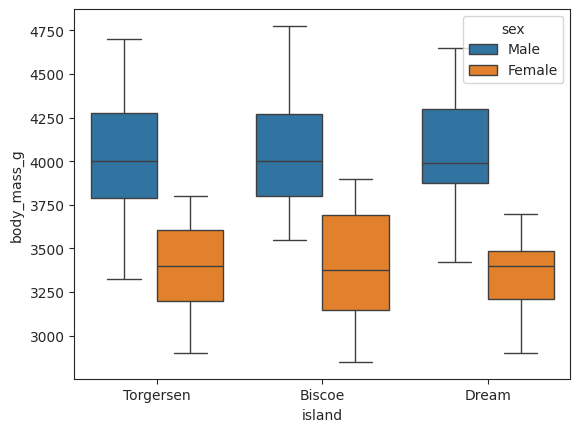

In [ ]:
_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=adelie)

La masa no parece variar según la isla, por lo que podemos sentirnos cómodos agrupando los datos por islas. Sin embargo, el peso sí parece variar en función del sexo, así que vamos a examinarlo más detenidamente:


In [ ]:
f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000
f

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [ ]:
m = adelie[adelie.sex == 'Male']['body_mass_g'].to_numpy()/1000
m

array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [ ]:
fbar = f.mean()
fbar

3.368835616438356

In [ ]:
mbar = m.mean()
mbar

4.043493150684932

Para cuantificar si los hombres pesan significativamente más que las mujeres, podemos utilizar la prueba **Welch *t***, ideada por el estadístico británico del siglo XX Bernard Lewis Welch:
$$ t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s^2_x}{n_x} + \frac{s^2_y}{n_y}}} $$
Donde:
* $\bar{x}$ y $\bar{y}$ son las medias muestrales
* $s^2_x$ y $s^2_y$ son las varianzas de la muestra
* $n_x$ y $n_y$ son los tamaños de las muestras


**N.B.**: La prueba *t* independiente de Student es notablemente más popular que la de Welch, pero la de Student asume varianzas poblacionales iguales (es decir, $\sigma^2_x \approx \sigma^2_y$), lo que la hace menos robusta. En caso de que tenga curiosidad, la fórmula de Student es la misma que la de Welch, excepto que utiliza una varianza conjunta $s^2_p$ en lugar de las varianzas de muestras individuales ($s^2_x$ y $s^2_y$). Puede obtener más información [aquí](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test).


In [ ]:
sf = f.var(ddof=1)
sm = m.var(ddof=1)

In [ ]:
nf = f.size
nm = m.size

In [ ]:
t = (fbar-mbar)/(sf/nf + sm/nm)**(1/2)
t

-13.126285923485879

Los grados de libertad para calcular el valor *p* se estiman utilizando la [ecuación de Welch-Satterthwaite](https://en.wikipedia.org/wiki/Welch-Satterthwaite_equation), que no detallaremos pero que se define como:


In [ ]:
def ws_eqn(sx, sy, nx, ny):
    return (sx / nx + sy / ny)**2 / (sx**2 / (nx**2 * (nx - 1)) + sy**2 / (ny**2 * (ny - 1)))

In [ ]:
df = ws_eqn(sf, sm, nf, nm)
df

135.69357893530386

In [ ]:
p = 2 * st.t.cdf(-abs(t), df) # o p_from_t(t, df+1)
p

6.402319748031518e-26

In [ ]:
p_from_t(t, df+1)

6.402319748031518e-26

In [ ]:
-np.log10(p)

25.193662639886046

In [ ]:
st.ttest_ind(f, m, equal_var=False)

TtestResult(statistic=-13.126285923485879, pvalue=6.402319748031518e-26, df=135.69357893530386)

#### Prueba *t* de Student para muestras emparejadas


En ocasiones, tenemos dos vectores en los que cada elemento del vector *x* tiene un elemento correspondiente en el vector *y*.

Por ejemplo, podríamos realizar un experimento en el que pacientes con Alzheimer recibieran un fármaco un día (condición experimental) y una pastilla de azúcar placebo (condición de control) otro día. A continuación, podemos medir el olvido de los pacientes en ambos días para comprobar si el fármaco tiene un impacto significativo en la memoria.

Para un tamaño de muestra dado, una prueba *t* emparejada es más potente que una prueba *t* no emparejada (independiente) porque la varianza de *x* está directamente relacionada con la varianza de *y*: Un paciente con Alzheimer grave tenderá a ser relativamente olvidadizo ambos días, mientras que un paciente con Alzheimer leve tenderá a ser relativamente olvidadizo ambos días. Con muestras pareadas, capturamos esta potencia comparando la *diferencia* entre *x* e *y*, por ejemplo, la diferencia en la falta de memoria de un paciente dado cuando se le administra el fármaco en relación con cuando se le administra la pastilla de azúcar.

Por el contrario, en el caso de los pingüinos, no podríamos emparejar un pingüino macho con una pingüina hembra. O pensemos en una situación en la que suministramos un fármaco a un grupo de pacientes de Alzheimer mientras que suministramos un placebo a un grupo de pacientes totalmente distinto (independiente). De hecho, con una prueba *t* independiente podríamos incluso tener diferentes tamaños de muestra en los dos grupos, mientras que esto es imposible con una prueba *t* pareada.


Veamos un ejemplo:

In [ ]:
exercise = sns.load_dataset('exercise')
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


En el conjunto de datos hay 30 personas, a las que se tomó el pulso en tres momentos distintos del experimento (es decir, al cabo de uno, 15 y 30 minutos). Se asignaron diez personas a cada uno de los tres grupos de actividad:


In [ ]:
np.unique(exercise.kind, return_counts=True)

(array(['rest', 'running', 'walking'], dtype=object), array([30, 30, 30]))

Dentro de cada uno de esos grupos de actividad, la mitad de los participantes sigue una dieta baja en grasas, mientras que la otra mitad sigue una dieta sin grasas:


In [ ]:
np.unique(exercise.diet, return_counts=True)

(array(['low fat', 'no fat'], dtype=object), array([45, 45]))

Para simplificar, consideremos sólo uno de los seis grupos experimentales, digamos el de los que caminan y hacen dieta sin grasas:


In [ ]:
walk_no = exercise[(exercise.diet == 'no fat') & (exercise.kind == 'walking')]
walk_no

,Unnamed: 0,id,diet,pulse,time,kind
45,45,16,no fat,84,1 min,walking
46,46,16,no fat,86,15 min,walking
47,47,16,no fat,89,30 min,walking
48,48,17,no fat,103,1 min,walking
49,49,17,no fat,109,15 min,walking
50,50,17,no fat,90,30 min,walking
51,51,18,no fat,92,1 min,walking
52,52,18,no fat,96,15 min,walking
53,53,18,no fat,101,30 min,walking
54,54,19,no fat,97,1 min,walking


(Obsérvese cómo el participante 16 tiene una frecuencia cardiaca relativamente baja en los tres puntos temporales, mientras que el participante 20 tiene una frecuencia cardiaca relativamente alta en los tres puntos temporales).


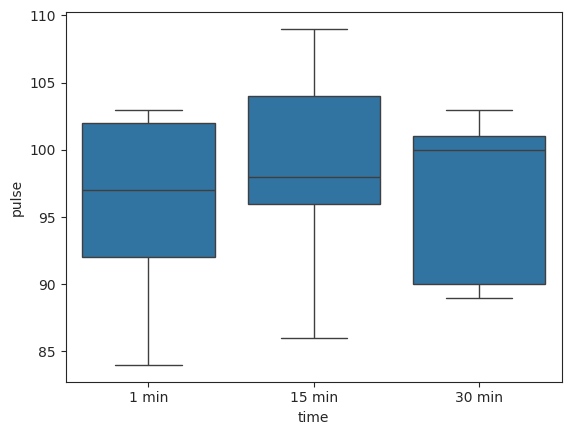

In [ ]:
_ = sns.boxplot(x='time', y='pulse', data=walk_no)

In [ ]:
min1 = walk_no[walk_no.time == '1 min']['pulse'].to_numpy()
min1

array([ 84, 103,  92,  97, 102])

In [ ]:
min1.mean()

95.6

In [ ]:
min15 = walk_no[walk_no.time == '15 min']['pulse'].to_numpy()
min15

array([ 86, 109,  96,  98, 104])

In [ ]:
min15.mean()

98.6

In [ ]:
min30 = walk_no[walk_no.time == '30 min']['pulse'].to_numpy()
min30

array([ 89,  90, 101, 100, 103])

In [ ]:
min30.mean()

96.6

(Con muestras emparejadas, podemos representar los valores en un diagrama de dispersión, lo que no tendría sentido con muestras independientes, por ejemplo:)


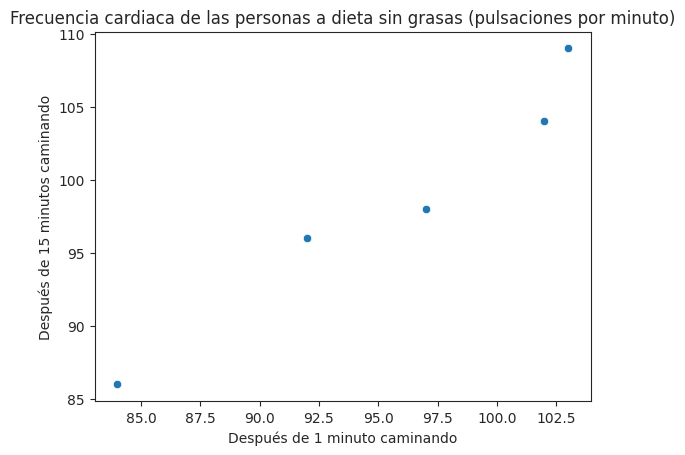

In [ ]:
sns.scatterplot(x=min1, y=min15)
plt.title('Frecuencia cardiaca de las personas a dieta sin grasas (pulsaciones por minuto)')
plt.xlabel('Después de 1 minuto caminando')
_ = plt.ylabel('Después de 15 minutos caminando')

Para evaluar si la frecuencia cardíaca media varía significativamente después de un minuto de caminata en relación con después de 15 minutos, podemos utilizar la prueba *t* de **muestra apareada** (también conocida como **dependiente**) de Student:
$$ t = \frac{\bar{d} - \mu_0}{s_\bar{d}} $$
Donde:
* $d$ es un vector de las diferencias entre muestras pareadas $x$ e $y$.
* $\bar{d}$ es la media de las diferencias
* $\mu_0$ suele ser cero, lo que significa que la hipótesis nula es que no hay diferencia entre $x$ e $y$.
* $s_\bar{d}$ es el error estándar de las diferencias


(Observe la similitud con la fórmula de la prueba *t* de muestra única).


In [ ]:
d = min15 - min1
d

array([2, 6, 4, 1, 2])

In [ ]:
dbar = d.mean()
dbar

3.0

In [ ]:
sd = st.sem(d)
sd

0.8944271909999159

In [ ]:
t = (dbar-0)/sd
t

3.3541019662496847

In [ ]:
p_from_t(t, d.size)

0.02846020325433834

In [ ]:
st.ttest_rel(min15, min1)

TtestResult(statistic=3.3541019662496847, pvalue=0.02846020325433834, df=4)

En cambio, si pusiéramos los mismos valores en una prueba *t* independiente...


In [ ]:
st.ttest_ind(min15, min1, equal_var=False)

TtestResult(statistic=0.5729114862838532, pvalue=0.5826164805627767, df=7.91150470414055)

#### Ejemplos de Machine Learning

* Muestra única: ¿Mi modelo estocástico tiende a ser más preciso que una referencia establecida?
* Muestras independientes: ¿Mi modelo tiene sesgos no deseados, por ejemplo, los hombres blancos obtienen mejores resultados que otros grupos demográficos con el modelo HR?
* Muestras emparejadas: ¿Es el nuevo modelo TensorFlow.js significativamente más rápido? (emparejado por navegador / dispositivo)


**Ejercicios**

1. Realizas cuatro experimentos adicionales con tu levadura de cerveza OMG y ahora tienes los siguientes ocho rendimientos de cerveza negra: `[48, 50, 54, 60, 49, 55, 59, 62]`. ¿Cuál es la estadística *t* y es significativamente diferente del proceso base de 50L?
2. ¿Varía significativamente la longitud de las aletas de los pingüinos Adelia de la isla del Sueño en función del sexo?
2. ¿Fue diferente la frecuencia cardiaca de las personas que hicieron dieta baja en grasas después de un minuto de descanso en relación con después de 15 minutos de descanso?

**Alerta de spoiler**: Soluciones a continuación


**Soluciones**
1. La levadura OMG produce una media de 54,6 L, que es significativamente más fuerte que el proceso de referencia, *t*(7) = 2,45, $p < 0,05$.


In [ ]:
st.ttest_1samp([48, 50, 54, 60, 49, 55, 59, 62], 50)

TtestResult(statistic=2.448085108904054, pvalue=0.0442312968303811, df=7)

2. En la isla del Sueño, las aletas de los pingüinos Adelia macho (191,9 mm) son significativamente más largas que las de las hembras (187,9 mm), *t* = 2,4, *p* < .05.


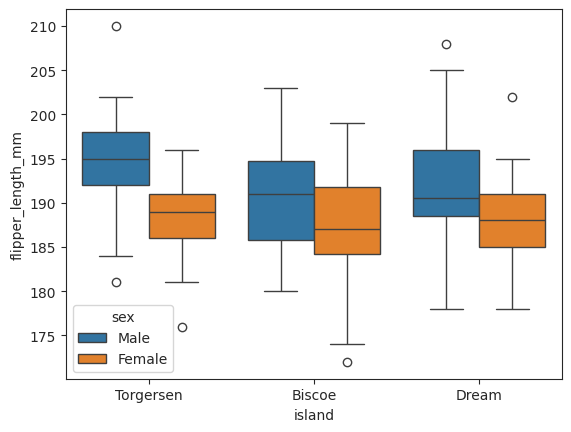

In [ ]:
_ = sns.boxplot(x='island', y='flipper_length_mm', hue='sex', data=adelie)

In [ ]:
f = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['flipper_length_mm'].to_numpy()
m = adelie[(adelie.sex == 'Male') & (adelie.island == 'Dream')]['flipper_length_mm'].to_numpy()

In [ ]:
f.mean()

187.85185185185185

In [ ]:
m.mean()

191.92857142857142

In [ ]:
tp = st.ttest_ind(f, m, equal_var=False)
tp

TtestResult(statistic=-2.446038619999187, pvalue=0.017898599613024185, df=51.48552818449215)

In [ ]:
tp.pvalue

0.017898599613024185

3. La frecuencia cardiaca de las personas que seguían una dieta baja en grasas no cambió significativamente tras un minuto de descanso (88,6 lpm) en relación con después de 15 minutos de descanso (89,6 lpm), *t*=2,2, *p* = .09.


In [ ]:
rest_lo = exercise[(exercise.diet == 'low fat') & (exercise.kind == 'rest')]

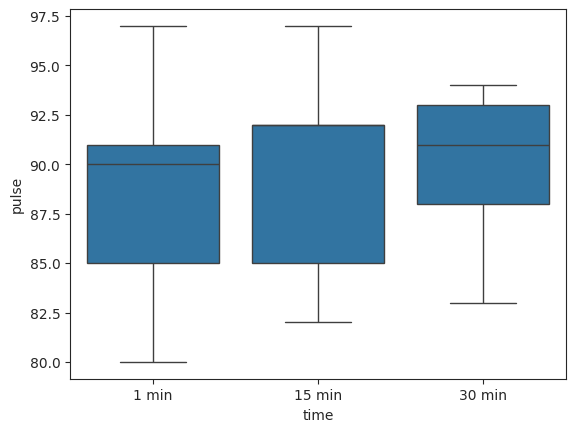

In [ ]:
_ = sns.boxplot(x='time', y='pulse', data=rest_lo)

In [ ]:
min1 = rest_lo[rest_lo.time == '1 min']['pulse'].to_numpy()
min1.mean()

88.6

In [ ]:
min15 = rest_lo[rest_lo.time == '15 min']['pulse'].to_numpy()
min15.mean()

89.6

In [ ]:
st.ttest_rel(min15, min1)

TtestResult(statistic=2.23606797749979, pvalue=0.08900934250008564, df=4)

### Intervalos de Confianza

Al examinar las medias muestrales como hemos hecho para la prueba *t*, una herramienta estadística útil es el **intervalo de confianza** (IC), que, por ejemplo, vemos a menudo asociado a los resultados de las encuestas cuando hay unas próximas elecciones. Los IC nos permiten hacer afirmaciones como «hay un 95% de posibilidades de que la media de la población se encuentre dentro de este rango concreto de valores».


Podemos calcular un CI reordenando la fórmula *z*-score:
$$ \text{C.I.} = \bar{x} \pm z \frac{s}{\sqrt{n}} $$
Donde:
* $\bar{x}$ es la media muestral
* $s$ es la desviación típica de la muestra
* $n$ es el tamaño de la muestra
* $z$ corresponde a un umbral de puntuación *z* (por ejemplo, el IC del 95% más común es $z \pm 1,960$; otros populares son el IC del 90% a $z \pm 1,645$ y el IC del 99% a $z \pm 2,576$)


Por ejemplo, para hallar el intervalo de confianza del 95% para el verdadero rendimiento medio de nuestra levadura OMG:


In [ ]:
x = np.array([48, 50, 54, 60, 49, 55, 59, 62])

In [ ]:
xbar = x.mean()
s = x.std()
n = x.size

In [ ]:
z = 1.96

In [ ]:
def CIerr_calc(my_z, my_s, my_n):
    return my_z*(my_s/my_n**(1/2))

In [ ]:
CIerr = CIerr_calc(z, s, n)

In [ ]:
CIerr

3.4637403013216796

In [ ]:
xbar + CIerr

58.08874030132168

In [ ]:
xbar - CIerr

51.16125969867832

Por lo tanto, hay un 95% de posibilidades de que el verdadero rendimiento medio de nuestra levadura OMG se encuentre en el intervalo de 51,2 a 58,1 litros. Dado que este IC no se solapa con la media de referencia establecida de 50L, esto corresponde a afirmar que el rendimiento OMG es significativamente mayor que la línea de base donde $\alpha = .05$, como ya hemos determinado:


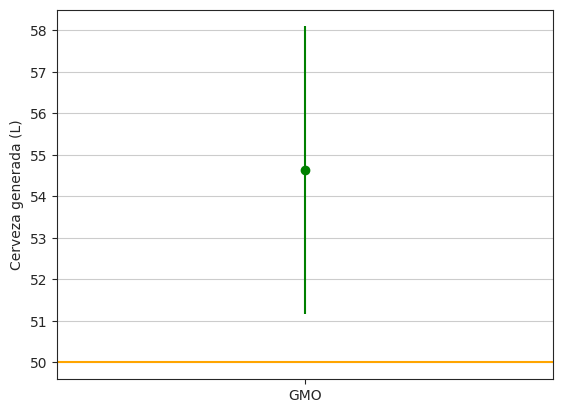

In [ ]:
fig, ax = plt.subplots()
plt.ylabel('Cerveza generada (L)')
plt.grid(axis='y')
ax.errorbar(['GMO'], [xbar], [CIerr], fmt='o', color='green')
_ = ax.axhline(50, color='orange')

Del mismo modo, podemos comparar varias medias muestrales con los IC. Usando de nuevo nuestros pingüinos:


In [ ]:
fCIerr = CIerr_calc(z, sf, nf)
mCIerr = CIerr_calc(z, sm, nm)

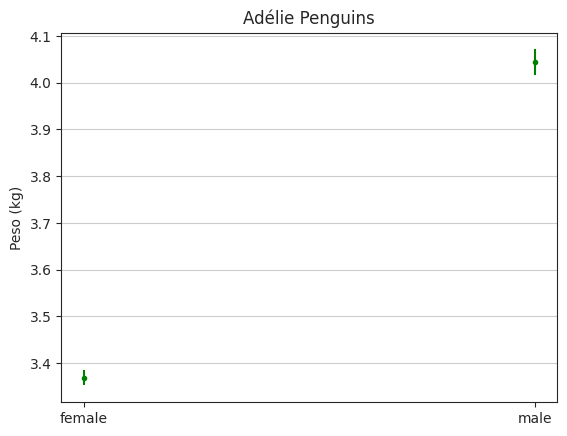

In [ ]:
fig, ax = plt.subplots()
plt.title('Adélie Penguins')
plt.ylabel('Peso (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['female', 'male'], [fbar, mbar], [fCIerr, mCIerr],
                fmt='.', color='green')

Los IC no se solapan ni de lejos, lo que corresponde a la diferencia extremadamente significativa (-log*P* $\approx 25$) en el peso de los pingüinos.


En cambio, los IC de las hembras de pingüino de las tres islas...


In [ ]:
t = adelie[(adelie.sex == 'Female') & (adelie.island == 'Torgersen')]['body_mass_g'].to_numpy()/1000
b = adelie[(adelie.sex == 'Female') & (adelie.island == 'Biscoe')]['body_mass_g'].to_numpy()/1000
d = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['body_mass_g'].to_numpy()/1000

In [ ]:
means = [t.mean(), b.mean(), d.mean()]

In [ ]:
s_t, sb, sd = t.var(ddof=1), b.var(ddof=1), d.var(ddof=1) # s_t to disambiguate stats package

In [ ]:
nt, nb, nd = t.size, b.size, d.size

In [ ]:
CIerrs = [CIerr_calc(z, s_t, nt), CIerr_calc(z, sb, nb), CIerr_calc(z, sd, nd)]

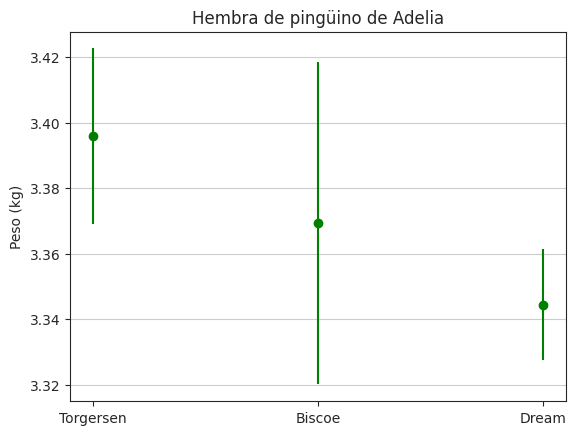

In [ ]:
fig, ax = plt.subplots()
plt.title('Hembra de pingüino de Adelia')
plt.ylabel('Peso (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['Torgersen', 'Biscoe', 'Dream'], means, CIerrs,
                fmt='o', color='green')

### ANOVA: Análisis de la varianza


**El análisis de la varianza** (ANOVA) nos permite comparar más de dos muestras (por ejemplo, las tres islas en el caso del peso de los pingüinos) en una única prueba estadística.


Para aplicar el ANOVA, debemos hacer tres suposiciones:
1. Muestras independientes
2. Poblaciones distribuidas normalmente
3. *Homoscedasticidad*: Las desviaciones típicas de la población son iguales


Aunque no es especialmente complicado bajo el capó (puede profundizar en las fórmulas [aquí](https://en.wikipedia.org/wiki/Analysis_of_variance#Logic)), ANOVA podría ser el tema menos ampliamente aplicable dentro de *Introducción a la Estadística* a ML, así que en aras del tiempo, pasaremos directamente al código Python:


In [ ]:
st.f_oneway(t, b, d)

F_onewayResult(statistic=0.22627752438542714, pvalue=0.7980777848719299)

### Coeficiente de correlación de Pearson


Si tenemos dos vectores de la misma longitud, $x$ e $y$, en los que cada elemento de $x$ está emparejado con el elemento correspondiente de $y$, la **covarianza** proporciona una medida de lo relacionadas que están las variables entre sí:

$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

Uno de los inconvenientes de la covarianza es que confunde la escala relativa de dos variables con una medida de la relación entre ellas. **La correlación** se basa en la covarianza y supera este inconveniente mediante el cambio de escala, con lo que mide exclusivamente la relación (lineal). La correlación es mucho más común debido a esta diferencia.

El coeficiente de correlación (desarrollado por Karl Pearson en el siglo XX, aunque ya era conocido en el siglo XIX) se designa a menudo con $r$ o $\rho$ y se define por:

$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
x = iris.sepal_length
y = iris.petal_length

In [ ]:
sns.set_style('darkgrid')

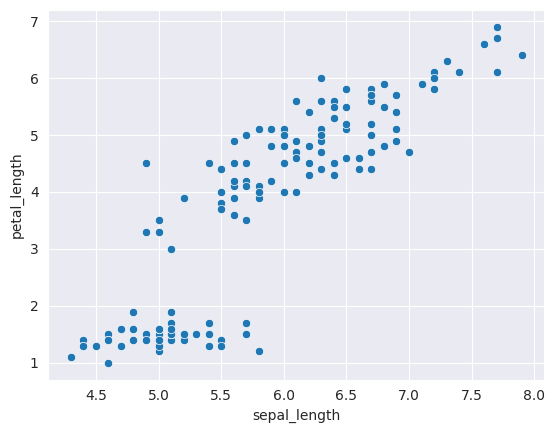

In [ ]:
_ = sns.scatterplot(x=x, y=y)

In [ ]:
n = iris.sepal_width.size

In [ ]:
xbar, ybar = x.mean(), y.mean()

In [ ]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [ ]:
cov = sum(product)/n
cov

1.2658200000000006

In [ ]:
r = cov/(np.std(x)*np.std(y))
r

0.8717537758865835

Llegamos a este punto en *Probabilidad*. Ahora, en cuanto a cómo determinar un valor *p*, primero calculamos el estadístico *t*....
$$ t = r \sqrt{\frac{n-2}{1-r^2}} $$

(Esta fórmula normaliza el coeficiente de correlación, teniendo en cuenta el tamaño de la muestra *n* y la fuerza de la relación *r*, para producir un estadístico *t* que sigue la [distribución *t* de Student](https://en.wikipedia.org/wiki/Student%27s_t-distribution).)


In [ ]:
t = r*((n-2)/(1-r**2))**(1/2)
t

21.646019345759807

...que podemos convertir en un valor *p* como hemos hecho varias veces más arriba:


In [ ]:
p = p_from_t(t, n-1)
p

1.0386674194495906e-47

In [ ]:
-np.log10(p)

46.98352349096045

Esto confirma que la correlación positiva de la longitud del sépalo del iris con la longitud del pétalo es (¡extremadamente!) significativa desde el punto de vista estadístico.


Todo lo anterior se puede hacer en una sola línea con el método `pearsonr()` de SciPy:


In [ ]:
st.pearsonr(x, y)

PearsonRResult(statistic=0.8717537758865831, pvalue=1.0386674194498827e-47)

Y, como referencia, aquí hay una correlación que no es significativa ($r \approx 0$):


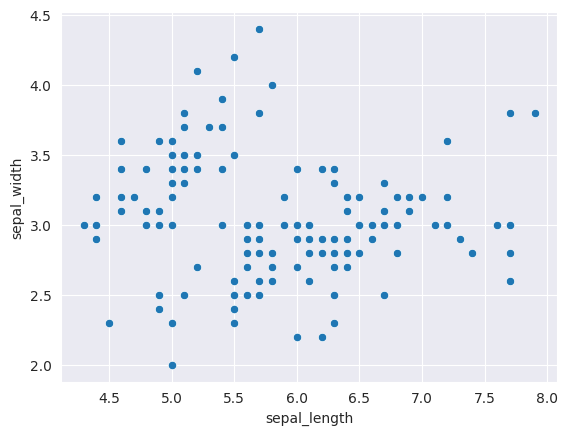

In [ ]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [ ]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300206, pvalue=0.15189826071144746)

### El coeficiente de determinación


...también conocido como $r^2$, es la proporción de varianza de una variable explicada por otra.

Puede oscilar entre 0 y 1 y es simplemente el cuadrado de la $r$ de Pearson:


In [ ]:
rsq = r**2
rsq

0.7599546457725157

En este caso, indica que el 76% de la varianza en la longitud de los pétalos del iris puede ser explicada por la longitud de los sépalos. (Esto es más fácil de entender cuando una variable podría impulsar directamente la variación en la otra; más sobre esto en el Segmento 2).


En comparación, sólo el 1,4% de la varianza de la anchura de los sépalos puede explicarse por la longitud de los mismos:


In [ ]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]**2

0.013822654141080705

### Correlación frente a causalidad


La correlación no implica **causalidad** por sí misma. Por ejemplo, la longitud de los sépalos y la de los pétalos están muy correlacionadas, pero esto no implica que la longitud de los sépalos sea la causa de la longitud de los pétalos o viceversa. (Se proporcionan miles de correlaciones espurias [aquí](https://www.tylervigen.com/spurious-correlations) para su diversión).


La causalidad tiene mucho que ver, y recomiendo [*Causality*](http://bayes.cs.ucla.edu/BOOK-2K/) de Judea Pearl, el texto técnico clásico sobre el tema, si deseas profundizar en él. [*The Book of Why*](http://bayes.cs.ucla.edu/WHY/) es una alternativa excepcional del mismo autor.


En resumen, se requieren tres criterios para inferir relaciones causales:

1. **Covariación**: Dos variables varían juntas (este criterio se cumple en el caso de la longitud de los sépalos y los pétalos)
2. **Precedencia temporal**: La variable afectada debe variar *después* de que varíe la variable causal.
3. **Eliminación de variables extrañas**: Debemos estar seguros de que ninguna tercera variable está causando la variación. Esto puede ser complicado en el caso de los datos obtenidos únicamente por observación, pero más fácil cuando podemos controlar la variable causal, por ejemplo, con ensayos aleatorios de control (idealmente a doble ciego).


Algunos ejemplos de dónde podríamos inferir causalidad a partir de correlación en ML:
* Neuronas adicionales --> mayor precisión
* Servidores adicionales o RAM --> menor tiempo de inferencia
* Eliminación de pronombres --> menos sesgo demográfico en el modelo


### Corrección de comparaciones múltiples


Uno de los principales problemas de la estadística frecuentista es el de las comparaciones múltiples:

* Si se realizan 20 pruebas estadísticas en las que no hay ningún efecto real (es decir, la hipótesis nula es verdadera), es de esperar que una de ellas resulte significativa sólo por azar (es decir, un *fallo positivo* o *error de tipo I*).
* Si se realizan cien pruebas en estas circunstancias, cabe esperar cinco falsos positivos.


La solución más sencilla, y de hecho la más utilizada, es la **corrección de Bonferroni** (llamada así por el matemático italiano del siglo XX Carlo Emilio Bonferroni). Suponiendo que quisiéramos un alfa global = $0,05$:

* Si pensamos realizar diez pruebas ($m=10$), el umbral de significación para cada prueba individual es $\frac{\alpha}{m} = \frac{.05}{10} = .005$.
* Con 20 pruebas, es $\frac{\alpha}{m} = \frac{.05}{20} = .0025$.
* Con 100 pruebas, es $\frac{\alpha}{m} = \frac{.05}{100} = .0005$


(Existen otros enfoques, menos directos, para ajustar $\alpha$ para comparaciones múltiples. Están fuera de nuestro alcance, pero los principales se enumeran bajo el epígrafe *Métodos generales de ajuste alfa para comparaciones múltiples* [aquí](https://en.wikipedia.org/wiki/Multiple_comparisons_problem#See_also).)


**Volver a las diapositivas aquí.**

## Segmento 2: Regresión

### Mínimos cuadrados lineales para ajustar una recta a puntos de un plano cartesiano


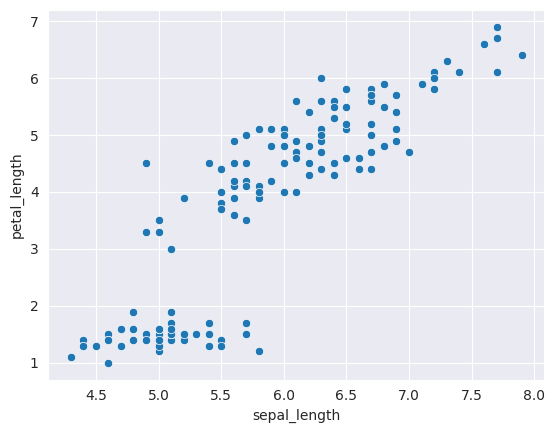

In [ ]:
_ = sns.scatterplot(x=x, y=y)

Consideremos el ajuste de una recta a puntos de un **plano cartesiano** (superficie bidimensional, con el eje $y$ perpendicular al eje horizontal $x$). Para ajustar dicha recta, los únicos parámetros que necesitamos son una intersección $y$ (digamos, $\beta_0$) y una pendiente (digamos, $\beta_1$):

$$ y = \beta_0 + \beta_1 x $$

Esto corresponde al caso en el que tenemos una única característica (una única variable predictora, $x$) en un modelo de regresión:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

El término $\epsilon$ denota **error**. Para un caso dado $i$, $\epsilon_i$ es una medida de la diferencia entre el verdadero $y_i$ y la estimación del modelo, $\hat{y}_i$. Si el modelo predice $y_i$ perfectamente, entonces $\epsilon_i = 0$.

Nuestro objetivo es encontrar los parámetros $\beta_0$ y $\beta_1$ que minimizan $\epsilon$ a través de todos los puntos de datos disponibles.

(Tenga en cuenta que la longitud del sépalo puede no ser un ejemplo ideal de una variable predictora, pero estos datos del iris están convenientemente disponibles en esta etapa del cuaderno).


En el caso de un modelo con un único predictor $x$, existe una fórmula de **mínimos cuadrados lineales** bastante sencilla que podemos utilizar para estimar $\beta_1$:
$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$


(Profundizaremos en el concepto de «mínimos cuadrados» en la próxima sección, por ahora podemos pensar en ello como la minimización del error cuadrático $(\hat{y}_i - y_i)^2$, que aislamos de $\text{cov}(x,y)$ mediante la división por $\sigma^2_x$)


In [ ]:
cov

1.2658200000000006

In [ ]:
beta1 = cov/np.var(x)
beta1

1.8584329782548419

Con $\hat{\beta}_1$ en la mano, entonces podemos reordenar la ecuación de la recta ($y = \beta_0 + \beta_1 x$) para estimar $\beta_0$:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [ ]:
beta0 = ybar - beta1*xbar
beta0

-7.101443369602459

In [ ]:
xline = np.linspace(4, 8, 1000)
yline = beta0 + beta1*xline

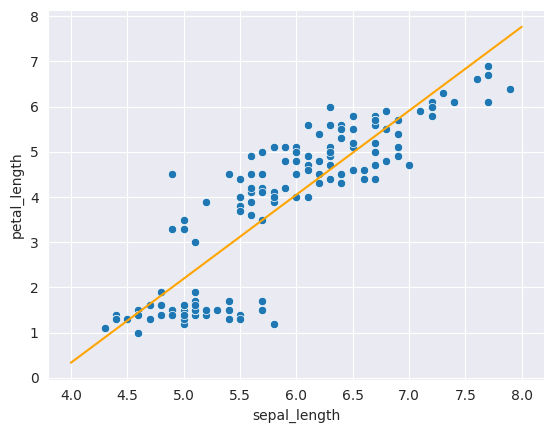

In [ ]:
sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, color='orange')

En términos de modelo de regresión, si se nos proporcionara una longitud de sépalo $x_i$ ahora podríamos utilizar las estimaciones de los parámetros $\hat{\beta}_0$ y $\hat{\beta}_1$ para predecir la longitud del pétalo de un iris:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

Por ejemplo, nuestro modelo predice que un iris con un sépalo de 5,5 cm de largo tendría un pétalo de 3,1 cm de largo:


In [ ]:
x_i = 5.5

In [ ]:
y_i = beta0 + beta1*x_i
y_i

3.1199380107991725

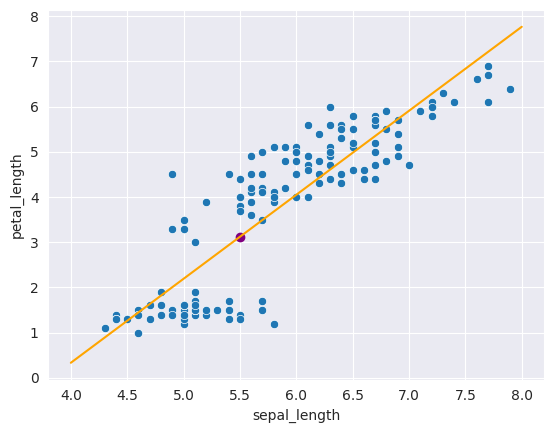

In [ ]:
sns.scatterplot(x=x, y=y)
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

Como segundo ejemplo, utilizando los mismos datos simulados del «medicamento contra el Alzheimer» que el [*Cuaderno de regresión en PyTorch*](https://github.com/joanby/matematicas-ml/blob/master/notebooks/regression-in-pytorch.ipynb) y varios otros de la serie *Fundamentos Matemáticos de ML*:


In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

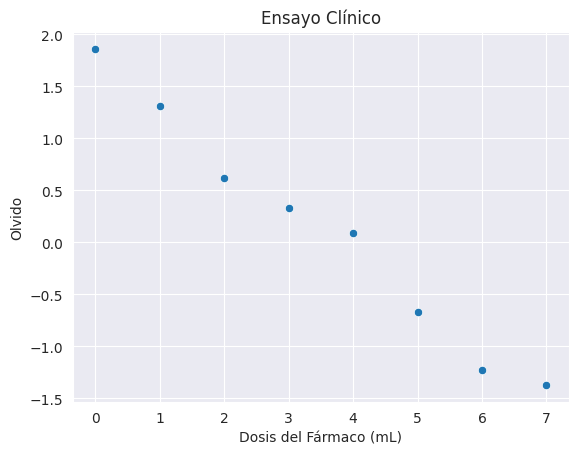

In [ ]:
sns.scatterplot(x=x, y=y)
plt.title("Ensayo Clínico")
plt.xlabel("Dosis del Fármaco (mL)")
_ = plt.ylabel("Olvido")

In [ ]:
cov_mat = np.cov(x, y)
cov_mat

array([[ 6.        , -2.81571429],
       [-2.81571429,  1.34362143]])

Recordemos de antes que:
$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

In [ ]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

-0.4692857142857143

...y que:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [ ]:
beta0 = y.mean() - beta1*x.mean()
beta0

1.76

...y, por supuesto, nuestra fórmula de regresión:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

In [ ]:
xline = np.linspace(0, 7, 1000)
yline = beta0 + beta1*xline

Al administrar 4,5mL del fármaco, nuestro modelo predice una puntuación de olvido de -0,35:


In [ ]:
x_i = 4.5

In [ ]:
y_i = beta0 + beta1*x_i
y_i

-0.35178571428571437

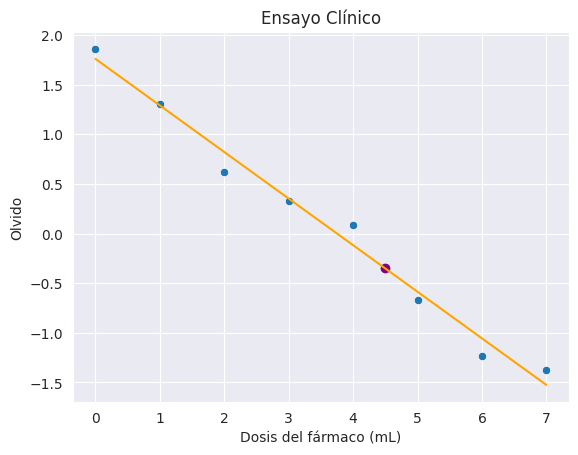

In [ ]:
sns.scatterplot(x=x, y=y)
plt.title("Ensayo Clínico")
plt.xlabel("Dosis del fármaco (mL)")
plt.ylabel("Olvido")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

**Ejercicio**: Con datos de pingüinos Adelia hembra, crea un modelo lineal de mínimos cuadrados que prediga la masa corporal en función de la longitud de las aletas. Predecir la masa de un pingüino de Adelia hembra que tiene una longitud de aleta de 197 mm.


In [ ]:
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
x = adelie[adelie.sex == 'Female']['flipper_length_mm'].to_numpy()
y = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000

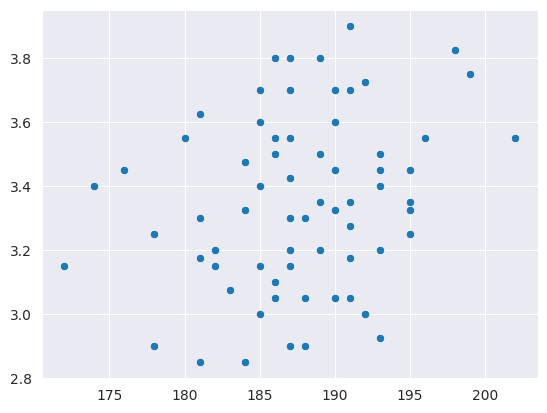

In [ ]:
_ = sns.scatterplot(x=x, y=y)

In [ ]:
cov_mat = np.cov(x, y)
cov_mat

array([[31.304414  ,  0.3962852 ],
       [ 0.3962852 ,  0.07256564]])

In [ ]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

0.012659083726357767

In [ ]:
beta0 = y.mean() - beta1*x.mean()
beta0

0.9915290574707036

In [ ]:
x_i = 197

In [ ]:
y_i = beta0 + beta1*x_i
y_i

3.485368551563184

In [ ]:
xline = np.linspace(170, 205, 1000)
yline = beta0 + beta1*xline

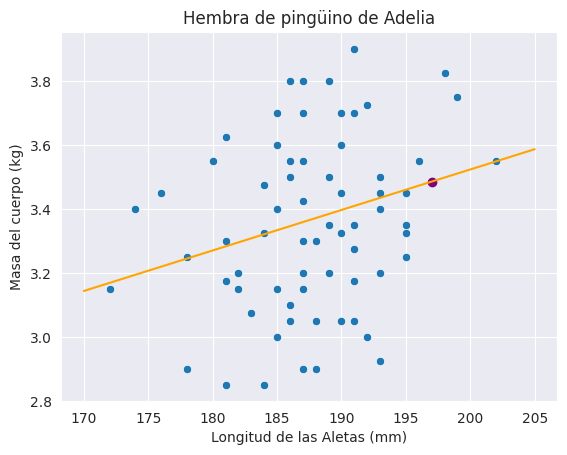

In [ ]:
sns.scatterplot(x=x, y=y)
plt.title("Hembra de pingüino de Adelia")
plt.xlabel("Longitud de las Aletas (mm)")
plt.ylabel("Masa del cuerpo (kg)")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

In [ ]:
cov_mat[0,1]/(cov_mat[0,0]**(1/2)*cov_mat[1,1]**(1/2))

0.2629296411882984

### Mínimos cuadrados ordinarios


**Los mínimos cuadrados ordinarios** (OLS) son un método lineal de mínimos cuadrados que podemos utilizar para estimar los parámetros de modelos de regresión que tienen más de una variable predictora, por ejemplo:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon $$

Generalización a $m$ predictores:
$$ y = \beta_0 + \sum_{j=1}^m \beta_j x_j + \epsilon $$

Sin embargo, para simplificar al máximo los cálculos, por ahora nos ceñiremos a un único predictor $x$ (en un ejemplo adaptado de [aquí](https://en.wikipedia.org/wiki/Linear_least_squares#Example)):


In [ ]:
x = np.array([1, 2, 3, 4.])
y = np.array([6, 5, 7, 10.])

In [ ]:
sns.set_style('whitegrid')

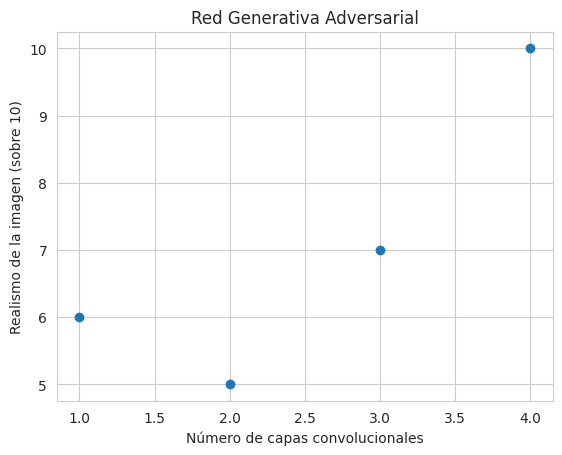

In [ ]:
fig, ax = plt.subplots()
plt.title('Red Generativa Adversarial')
plt.xlabel('Número de capas convolucionales')
plt.ylabel('Realismo de la imagen (sobre 10)')
_ = ax.scatter(x, y)

Como es típico en el ajuste de modelos de regresión, tenemos un sistema *sobredeterminado* de ecuaciones de álgebra lineal. A partir de la ecuación de regresión general $y = \beta_0 + \beta_1 x$, tenemos cuatro ecuaciones (una para cada instancia $i$) con los dos parámetros desconocidos $\beta_0$ y $\beta_1$ compartidos en todo el sistema.

$$ 6 = \beta_0 + \beta_1 $$
$$ 5 = \beta_0 + 2\beta_1 $$
$$ 7 = \beta_0 + 3\beta_1 $$
$$ 10 = \beta_0 + 4\beta_1 $$

Como tenemos más ecuaciones que incógnitas, no podemos resolver los parámetros mediante reordenación algebraica. Sin embargo, podemos estimar parámetros que resuelvan aproximadamente todas las ecuaciones con la *Pseudoinversa de Moore-Penrose* (de [*Álgebra Lineal II*](https://github.com/joanby/matematicas-ml/blob/master/notebooks/2-linear-algebra-ii.ipynb)) o podríamos utilizar el cálculo de derivadas parciales que utilizaremos aquí. En cualquier caso, con el enfoque MCO, nuestro objetivo es minimizar la «suma de errores al cuadrado» (SSE).

El error cuadrático (también conocido como coste cuadrático, de *Calc II*) para una instancia dada $i$ es $(\hat{y}_i-y_i)^2$.

La SSE sobre $n$ instancias es entonces:
$$ \sum_{i=1}^n (\hat{y}_i-y_i)^2 $$


En este caso, donde $\hat{y}_i = \beta_0 + \beta_1 x_i$, podemos definir la función SSE como:
$$ S(\beta_0, \beta_1) = \sum_{i=1}^n (\beta_0 + \beta_1 x_i - y_i)^2 $$

Expandiendo la suma sobre las cuatro instancias de $i$:
$$ S(\beta_0, \beta_1) = [\beta_0 + \beta_1 - 6]^2 + [\beta_0 + 2\beta_1 - 5]^2 + [\beta_0 + 3\beta_1 - 7]^2 + [\beta_0 + 4\beta_1 - 10]^2 $$

A continuación (de forma bastante laboriosa) se expanden los cuadrados y se simplifica el resultado combinando términos semejantes:
$$ S(\beta_0, \beta_1) = 4\beta_0^2 + 30\beta_1^2 + 20\beta_0\beta_1 - 56\beta_0 - 154\beta_1 + 210 $$

Para minimizar SSE, ahora podemos utilizar derivadas parciales. En concreto, para encontrar donde no hay pendiente de $ S(\beta_0, \beta_1)$ con respecto a $\beta_0$:
$$ \frac{\partial S}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56 = 0 $$
...y $\beta_1$:
$$ \frac{\partial S}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154 = 0 $$

Reordenando, obtenemos un sistema de dos ecuaciones lineales llamadas las **ecuaciones normales** (por muchos parámetros que haya en el modelo es el número de filas de ecuaciones que tendremos en el sistema):
$$ 8\beta_0 + 20\beta_1 = 56 $$
$$ 20\beta_0 + 60\beta_1 = 154 $$

Una aproximación numérica útil para resolver $\beta_0$ y $\beta_1$ es la inversión de matrices (que cubrimos en detalle hacia el final del cuaderno [*Introducción al Álgebra Lineal*](https://github.com/joanby/matematicas-ml/blob/master/notebooks/1-intro-to-linear-algebra.ipynb)).

Para evitar confusiones con las variables más amplias $x$ (número de capas conv GAN) e $y$ (realismo de la imagen), utilicemos $A$ para la matriz de «entradas» y $z$ para el vector de «salidas», con el vector $w$ conteniendo los pesos desconocidos $\beta_0$ y $\beta_1$:$$ Aw = z $$

In [ ]:
A = np.array([[8, 20],[20, 60]])
A

array([[ 8, 20],
       [20, 60]])

In [ ]:
z = np.array([56, 154])

Para resolver $w$, podemos invertir $A$ (suponiendo que $A$ no sea singular, es decir, que todas sus columnas sean independientes):
$$ w = A^{-1}z $$

In [ ]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.75, -0.25],
       [-0.25,  0.1 ]])

In [ ]:
w = np.dot(Ainv, z)
w

array([3.5, 1.4])

Así, la línea que minimiza el error cuadrático en las cuatro ecuaciones tiene los parámetros $\hat{\beta}_0 = 3,5$ y $\hat{\beta}_1 = 1,4$:
$$ \hat{y} = 3.5 + 1.4 x $$

In [ ]:
xline = np.linspace(1, 4, 1000)
yline = w[0] + w[1]*xline

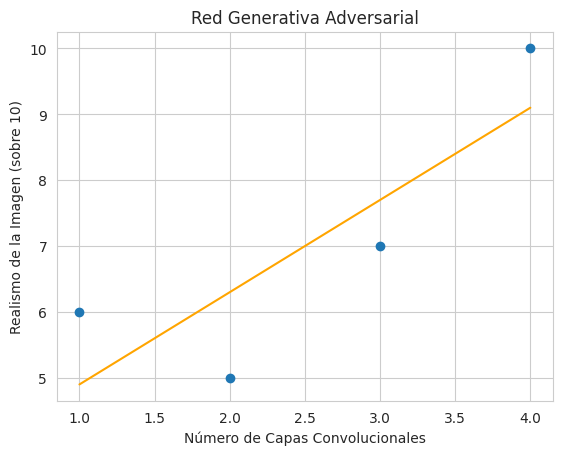

In [ ]:
fig, ax = plt.subplots()
plt.title('Red Generativa Adversarial')
plt.xlabel('Número de Capas Convolucionales')
plt.ylabel('Realismo de la Imagen (sobre 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')

Por diversión, siguiendo el álgebra lineal en las diapositivas, podríamos calcular la salida $\hat{y}$ a través de todas las instancias $i$:
$$ \hat{y} = Xw $$

In [ ]:
X = np.concatenate([np.matrix(np.ones(x.size)).T, np.matrix(x).T], axis=1)
X

matrix([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]])

In [ ]:
yhat = np.dot(X, w)
yhat

matrix([[4.9, 6.3, 7.7, 9.1]])

Por cierto, los **residuos** son las distancias entre $\hat{y}_i$ y $y_i$:


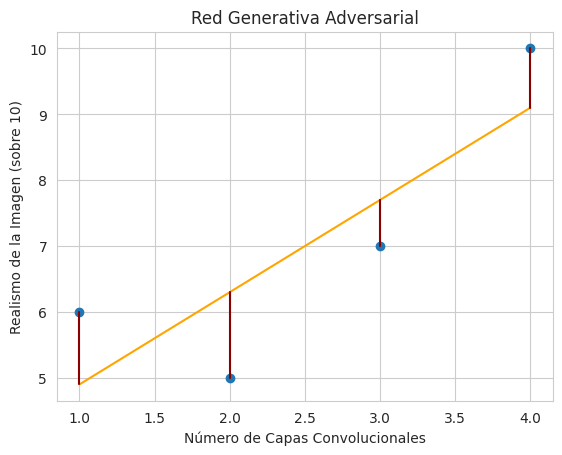

In [ ]:
fig, ax = plt.subplots()
plt.title('Red Generativa Adversarial')
plt.xlabel('Número de Capas Convolucionales')
plt.ylabel('Realismo de la Imagen (sobre 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')
for i in range(x.size):
    plt.plot([x[i],x[i]], [y[i],yhat[0,i]], color='darkred')

El cuadrado de estos residuos es lo que minimizamos con SSE en la regresión OLS.




---



El enfoque OLS anterior se amplía a una amplia variedad de circunstancias:

* Características múltiples ($x$, los predictores)
* Características polinómicas (normalmente cuadráticas), por ejemplo, $y = \beta_0 + \beta_1 x + \beta_2 x^2$.
* Características interactivas, por ejemplo, $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2$.
* Características discretas y categóricas, incluida cualquier combinación de características continuas y discretas.


Como ejemplo de esto último...


In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
sns.set_style('darkgrid')

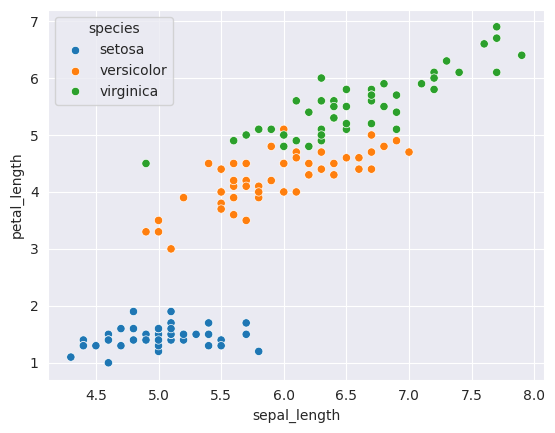

In [ ]:
_ = sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)

In [ ]:
import pandas as pd

In [ ]:
dummy = pd.get_dummies(iris.species, dtype = 'int64') # int64 dtype necesario para evitar ValueError cuando llamemos a sm.OLS() más abajo
dummy

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
y = iris.petal_length

In [ ]:
X = pd.concat([iris.sepal_length, dummy.setosa, dummy.versicolor], axis=1)
X # virginia como "baseline" donde setosa y versicolor son ambas 0

,sepal_length,setosa,versicolor
0,5.1,1,0
1,4.9,1,0
2,4.7,1,0
3,4.6,1,0
4,5.0,1,0
...,...,...,...
145,6.7,0,0
146,6.3,0,0
147,6.5,0,0
148,6.2,0,0


In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)
X

,const,sepal_length,setosa,versicolor
0,1.0,5.1,1,0
1,1.0,4.9,1,0
2,1.0,4.7,1,0
3,1.0,4.6,1,0
4,1.0,5.0,1,0
...,...,...,...,...
145,1.0,6.7,0,0
146,1.0,6.3,0,0
147,1.0,6.5,0,0
148,1.0,6.2,0,0


In [ ]:
model = sm.OLS(y, X)

In [ ]:
result = model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1890.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          1.46e-116
Time:                        06:34:31   Log-Likelihood:                -21.237
No. Observations:                 150   AIC:                             50.47
Df Residuals:                     146   BIC:                             62.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3877      0.301      4.611      0.000       0.793       1.982
sepal_length     0.6321      0.045     13.962      0.000       0.543       0.722
setosa          -3.0900      0.091    -33.870      0.000      -3.270      -2.910
versicolor      -0.8799      0.064    -13.800      0.000      -1.006      -0.754
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.310
Skew:                          -0.022   Prob(JB):                        0.856
Kurtosis:                       3.218   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nuestro modelo anterior del iris, con la longitud del sépalo como único predictor de la longitud del pétalo, tenía $r^2 = 0,76$. En nuestro último modelo del iris, los predictores explican la friolera del 97% de la varianza de la longitud de los pétalos.


In [ ]:
beta = result.params
beta

,0
const,1.387660
sepal_length,0.632110
setosa,-3.090002
versicolor,-0.879864


In [ ]:
xline = np.linspace(4, 8, 1000)
vi_yline = beta['const'] + beta['sepal_length']*xline
se_yline = beta['const'] + beta['sepal_length']*xline + beta['setosa']
ve_yline = beta['const'] + beta['sepal_length']*xline + beta['versicolor']

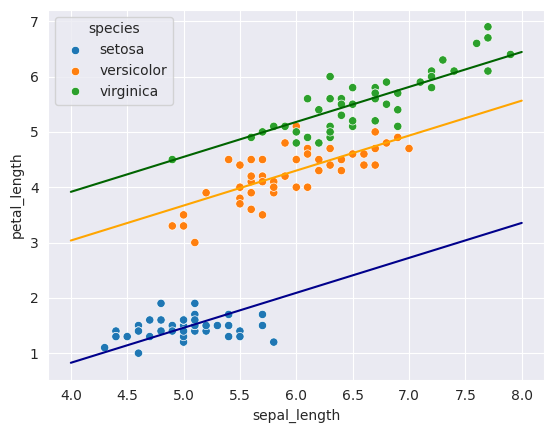

In [ ]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
_ = plt.plot(xline, ve_yline, color='orange')

Ahora usando nuestro modelo refinado, de tal manera que predice la longitud del pétalo de un iris *versicolor* con un sépalo de 5,5 cm de largo:


In [ ]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 1

In [ ]:
y_i = beta['const'] + beta['sepal_length']*x_sepall_i + beta['setosa']*x_setosa_i + beta['versicolor']*x_versic_i

In [ ]:
y_i

3.984400080089945

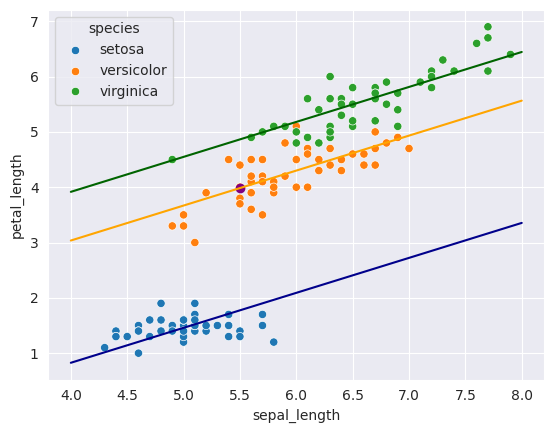

In [ ]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_sepall_i, y_i, marker='o', color='purple')

...o una *virginica* con un sépalo de la misma longitud:


In [ ]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 0 # the only change

In [ ]:
x_i = np.array([1, x_sepall_i, x_setosa_i, x_versic_i])

In [ ]:
y_i = np.dot(beta, x_i)

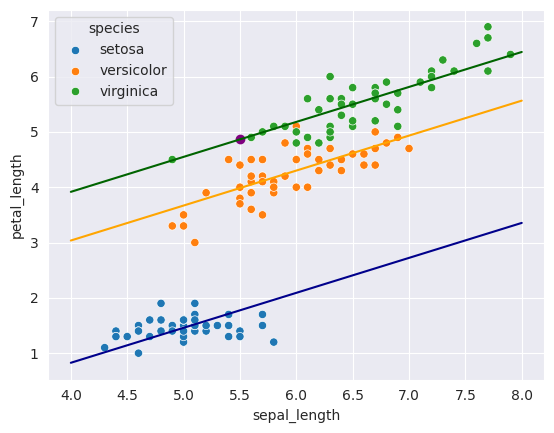

In [ ]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_i[1], y_i, marker='o', color='purple')

(También es posible que la pendiente varíe según la variable categórica, no sólo la intercepción $y$. Se trata de un *modelo lineal jerárquico* y el texto clásico al respecto es [Gelman & Hill, 2006](https://amzn.to/3hoOevb).)



---



**Ejercicio**:
Descarga el conjunto de datos de viviendas de California (el proceso se encuentra inmediatamente debajo) y utiliza el método `OLS()` de statsmodels para crear un modelo que utilice al menos algunas de las características proporcionadas para predecir el precio de la vivienda.


In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
housing = fetch_california_housing()

In [ ]:
# Precio medio de la vivienda en un determinado «grupo de bloques censales» en 100.000 dólares (del Censo de EE.UU. de 1990):
y = housing.target
y[0:20]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611, 2.815, 2.418, 2.135, 1.913, 1.592, 1.4  , 1.525, 1.555,
       1.587, 1.629])

In [ ]:
# Hay 20k bloques de viviendas en el dataset...
len(y)

20640

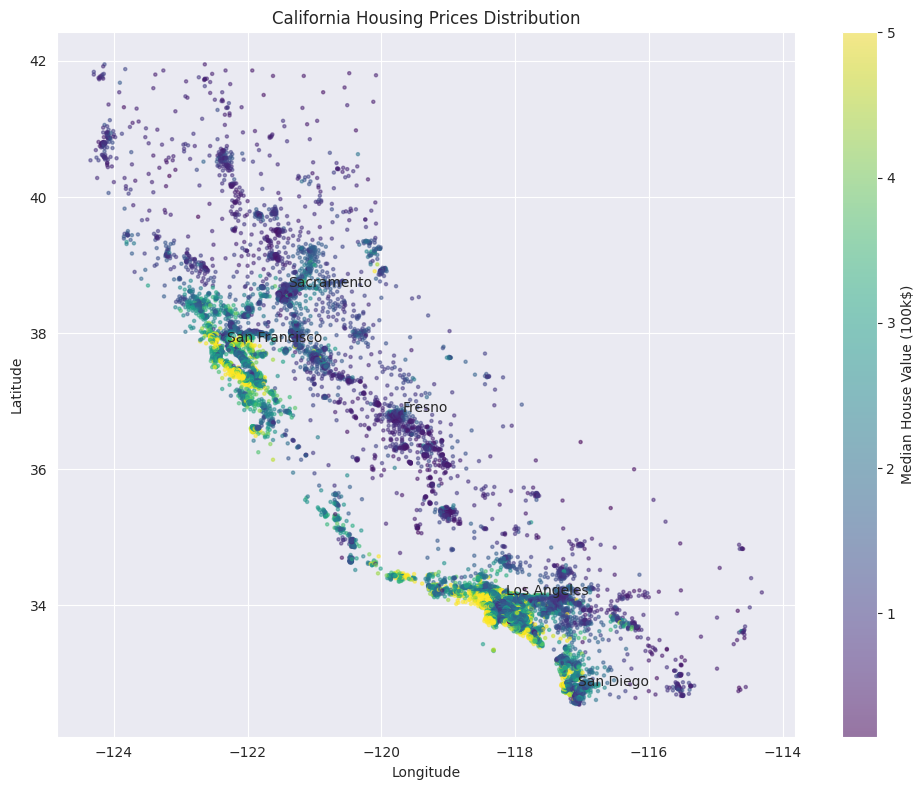

In [ ]:
# ...distribuidos por toda California:
lat = housing.data[:, housing.feature_names.index('Latitude')]
lon = housing.data[:, housing.feature_names.index('Longitude')]

# Creamos el scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(lon, lat, alpha=0.5, s=5, c=housing.target, cmap='viridis')

plt.title('Distribución de los precios de la vivienda en California')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Añadimos una colorbar
cbar = plt.colorbar()
cbar.set_label('Median House Value (100k$)')

# Anotamos las mayores ciudades (coordenadas aproximadas)
cities = {
    'San Francisco': (-122.4194, 37.7749),
    'Los Angeles': (-118.2437, 34.0522),
    'San Diego': (-117.1611, 32.7157),
    'Sacramento': (-121.4944, 38.5816),
    'Fresno': (-119.7871, 36.7378)
}

for city, coords in cities.items():
    plt.annotate(city, xy=coords, xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
X = pd.DataFrame(housing.data)
X.columns = housing.feature_names
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
# Descripción de las variables de características (y más información sobre el conjunto de datos en general):
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Regresión Logística

Con bastante frecuencia nos gustaría tener un modelo de regresión que predijera un resultado binario (por ejemplo, identificar si un artículo de comida rápida es un perrito caliente o no). Esto se puede conseguir con la **regresión logística**, que adapta la regresión lineal incluyendo la función *logit*:
$$ x = \text{log}(\frac{p}{1-p}) $$
Esta función utiliza el logaritmo natural y asigna una probabilidad binaria $p$ (que sólo puede ir de cero a uno) a un rango ilimitado ($-\infty$ a $\infty$).


Traducción realizada con la versión gratuita del traductor DeepL.com

In [ ]:
def logit(my_p): # También disponible en scipy.special.logit()
    return np.log(my_p/(1-my_p))

In [ ]:
logit(0.5)

0.0

In [ ]:
logit(0.1)

-2.197224577336219

In [ ]:
logit(0.01) # Cerca de cero, tiende a - infinito

-4.59511985013459

In [ ]:
logit(0.99) # Cerca de cero, tiende a + infinito

4.595119850134589

Más concretamente, la regresión logística utiliza la función *expit* (también conocida como función logística), que es la inversa de logit. Es decir, devuelve una probabilidad $p$ cuando se le pasa una entrada $x$ no limitada:
$$ p = \frac{1}{1+e^{-x}} $$

In [ ]:
def expit(my_x): # También disponible en scipy.special.expit()
    return 1/(1+np.exp(-my_x))

In [ ]:
expit(4.59512)

0.9900000014836675

Esta función logística nos permite asignar la salida no limitada de un modelo de regresión lineal a una probabilidad que va de cero a uno.


Veamos un ejemplo práctico:


In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
np.unique(titanic['survived'], return_counts=True)

(array([0, 1]), array([549, 342]))

In [ ]:
np.unique(titanic['sex'], return_counts=True)

(array(['female', 'male'], dtype=object), array([314, 577]))

In [ ]:
np.unique(titanic['class'], return_counts=True)

(array(['First', 'Second', 'Third'], dtype=object), array([216, 184, 491]))

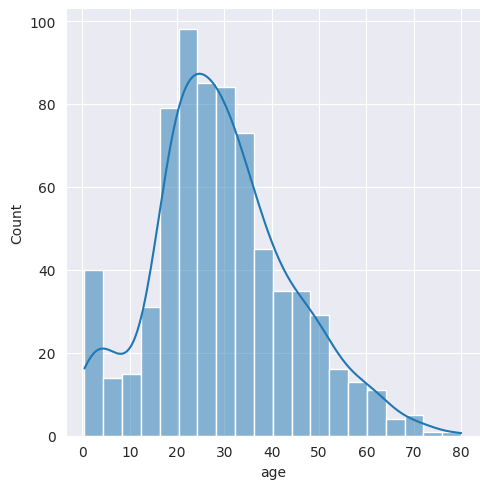

In [ ]:
_ = sns.displot(titanic['age'], kde=True)

In [ ]:
gender = pd.get_dummies(titanic['sex'], dtype = 'int64')
gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
clas = pd.get_dummies(titanic['class'], dtype = 'int64')
clas

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [ ]:
y = titanic.survived

In [ ]:
X = pd.concat([clas.First, clas.Second, gender.female, titanic.age], axis=1)
X = sm.add_constant(X)
X

,const,First,Second,female,age
0,1.0,0,0,0,22.0
1,1.0,1,0,1,38.0
2,1.0,0,0,1,26.0
3,1.0,1,0,1,35.0
4,1.0,0,0,0,35.0
...,...,...,...,...,...
886,1.0,0,1,0,27.0
887,1.0,1,0,1,19.0
888,1.0,0,0,1,NaN
889,1.0,1,0,0,26.0


In [ ]:
model = sm.Logit(y, X, missing='drop') # eliminamos las filtas que contienen NaN

In [ ]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Wed, 11 Sep 2024   Pseudo R-squ.:                  0.3289
Time:                        19:56:37   Log-Likelihood:                -323.64
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 2.074e-67
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3264      0.248     -5.351      0.000      -1.812      -0.841
First          2.5806      0.281      9.169      0.000       2.029       3.132
Second         1.2708      0.244      5.207      0.000       0.793       1.749
female         2.5228      0.207     12.164      0.000       2.116       2.929
age           -0.0370      0.008     -4.831      0.000      -0.052      -0.022
==============================================================================
"""

In [ ]:
beta = result.params
beta

,0
const,-1.326394
First,2.580625
Second,1.270826
female,2.522781
age,-0.036985


Como ejemplo, nuestro modelo sugiere que una joven de 17 años que viajara en primera clase (como Rose en la película de James Cameron de 1997) tenía un 95,9% de posibilidades de sobrevivir:


In [ ]:
linear_out = beta['const'] + beta['First']*1 + beta['Second']*0 + beta['female']*1 + beta['age']*17
linear_out

3.148263137776477

In [ ]:
expit(linear_out)

0.9588402300157423

En cambio, un varón de 20 años que viajara en tercera clase tenía un 11,2% de posibilidades de sobrevivir:


In [ ]:
jack = np.array([1, 0, 0, 0, 20])

In [ ]:
linear_out = np.dot(beta, jack)
linear_out

-2.066098896322207

In [ ]:
expit(linear_out)

0.11243575692429553

**Ejercicios**

1. Utiliza el método scikit-learn `train_test_split()` ([documentación aquí](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) para dividir los datos de titanic en un conjunto de datos de entrenamiento (digamos, dos tercios de los datos) y un conjunto de datos de prueba (un tercio de los datos).

2. 2. Vuelva a entrenar el modelo OLS anterior utilizando el conjunto de datos de entrenamiento recién creado. Utilizando el conjunto de datos de prueba, compruebe la calidad del modelo, por ejemplo, con respecto a:

    * Exactitud (utilizando un umbral de clasificación binaria estándar del 50%)
    * Área bajo la curva característica del operador receptor (cubrimos esto en [Cálculo II](https://github.com/joanby/matematicas-ml/blob/master/notebooks/4-calculus-ii.ipynb)).

3. Utiliza tu propia creatividad para añadir características adicionales a un modelo OLS y entrénalo utilizando el conjunto de entrenamiento. ¿Cómo se compara tu nuevo modelo con las métricas del conjunto de datos de prueba en relación con el modelo de referencia? ¿Y cómo se comparan con la [tabla de clasificación de Kaggle](https://www.kaggle.com/c/titanic/leaderboard)?


**Volver a las slides aquí.**

## Segmento 3: Estadística Bayesiana

### Teorema de Bayes

...nos permite encontrar $P(\text{x}|\text{y})$ cuando tenemos $P(\text{y}|\text{x})$:
$$ P(\text{x}|\text{y}) = \frac{P(\text{x})P(\text{y}|\text{x})}{P(\text{y})} $$

Usemos la *xkcd* [viñeta del sol que explota](https://xkcd.com/1132/) como ejemplo. Usando un umbral estándar $\alpha = .05$, el frecuentista rechazó la hipótesis nula de que el sol no había explotado porque la probabilidad de que el detector de neutrinos dé como resultado «SÍ» cuando el sol no ha explotado es $\frac{1}{6} \times \frac{1}{6} = \frac{1}{36} \approx 0,0278$, que es $<,05$.


Utilizando el teorema de Bayes, el estadístico bayesiano incorpora información adicional -en gran parte relacionada con la probabilidad de que el sol haya explotado independientemente de lo que diga el detector de neutrinos- para llegar a una conclusión diferente.

Utilicemos también algunos cálculos para estimar la probabilidad de que el sol haya explotado ($x = \text{exploded}$) dada la respuesta «SÍ» del detector de neutrinos ($y = \text{YES}$); es decir, $P(x|y)$. Para averiguarlo, necesitaremos $P(y|x)$, $P(x)$ y $P(y)$.

$P(y = \text{YES} | x = \text{exploded}) = \frac{35}{36} \approx 0,972 $.

$P(x = \text{exploded})$ se puede estimar aproximadamente. Es generoso suponer una probabilidad de $\frac{1}{1000}$ porque por cada mil días que pasan, el sol explota con mucha menos frecuencia que una vez. Además, a menos que el sol hubiera explotado sólo en los últimos minutos, ya estaríamos muertos. Por tanto, la probabilidad de que estemos vivos en un instante en el que el sol ha explotado es extremadamente pequeña. De todos modos, vamos con $\frac{1}{1000}$ porque incluso con esta cifra excesivamente generosa, vamos a demostrar el punto.

$P(y = \text{YES})$: Como suele ser el caso, esta probabilidad en el denominador del teorema de Bayes se puede calcular con la información que ya tenemos porque:
$$ P(\text{y}) = \sum_x P(\text{y}|x)P(x) $$
Sumando sobre los dos estados posibles de x ($x =$ explotado, $x =$ no explotado):
$$ P(y = \text{YES}) = P(\text{YES dado explotado})P(\text{explosionado}) + P(\text{YES dado no explotado})P(\text{no explotado}) $$
$$ = \left(\frac{35}{36}\right)\left(\frac{1}{1000}\right) + \left(\frac{1}{36}\right)\left(\frac{999}{1000}\right) $$
...que sale a $P(y = \text{YES}) \approx 0.0287$:


In [ ]:
py = (35/36.)*(1/1000.) + (1/36.)*(999/1000.)
py

0.02872222222222222

Ahora tenemos todo lo que necesitamos para aplicar el teorema de Bayes:


In [ ]:
py_givenx = 0.972
px = .0001

In [ ]:
def bayes(my_px, my_pygivenx, my_py):
    return (my_px*my_pygivenx)/my_py

In [ ]:
bayes(px, py_givenx, py)

0.0033841392649903296

Por lo tanto, incluso con nuestra generosa estimación de base de una probabilidad de $\frac{1}{1000}$ de que el sol haya explotado, la regla de Bayes nos permite encontrar una probabilidad del 0,3% de que el sol haya explotado dada la salida `SÍ` del detector de neutrinos. Sin duda, ¡unas probabilidades que merecen una apuesta de 50 dólares!


Se necesitarían varias horas para describir la inferencia bayesiana más allá del teorema de Bayes, pero aquí hay páginas de «iniciación» para cada una de las principales bibliotecas de Python, ordenadas aproximadamente desde la más ligera (más fácil de aprender) a la más complicada:

* [NumPyro](https://num.pyro.ai/en/latest/getting_started.html)
* [PyMC](https://www.pymc.io/projects/docs/en/stable/learn.html)
* [PyStan](https://pystan.readthedocs.io/en/latest/)

**Volver a las slides aquí.**